# Film Market Analysis

# Table of contents 

I. General Information. Interim conclusions.

II. Data preprocessing. Interim conclusions.

- Column headings processing.
- Changing the data type.
- Missing values processing.
- Duplicates processing.
- Categorical data processing.
- Numerical data processing.
- Data categorization.

III. Dataframe editing (calculated fields).

IV. Exploratory Data Analysis (EDA).

- Films at the box office. Box office dynamics. Interim conclusions.
- State-supported films. Interim conclusions. 
- "Good" films analysis. Interim conclusions.

V. General conclusion.

VI. Addon.

# General Information

In [1]:
# libraries import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from collections import defaultdict

<div class="alert alert-danger">
<b> Attention:</b> Github performs a static render of the notebooks and <b> it doesn't include the embedded HTML/JavaScript that makes up a plotly graph </b>. Therefore, all plotly charts in this notebook will be presented as static attached png files. </div>

In [2]:
# pandas customization
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option("display.max_columns", 100)

In [3]:
# seaborn customization
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style='whitegrid', palette='dark')

Displaying tables with borders:

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [5]:
# reading the files and saving it to the variables
try:
    data_movies = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/data_movies.csv')
    data_shows = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/data_shows.csv')
except:
    print('Something is wrong!')

In [6]:
# primary data analysis function
def get_info(df):
    '''The function takes a dataframe as an input and provides general information about it: dataframe shape (rows, columns),
    columns data type, number of non-null values (DataFrame.info()), first five rows (DataFrame.head(5)) and also brief 
    analysis for categorical and numerical data - DataFrame.describe().'''
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'Total number of rows: {df.shape[0]}, total number of columns: {df.shape[1]}.')
    print()
    print(df.info())
    display(df.head(5))
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [7]:
# applying get_info function
print('Movies info:')
get_info(data_movies)
print('Box office info:')
get_info(data_shows)

Movies info:
Total number of rows: 7486, total number of columns: 15.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null 

title   puNumber           show_start_date            type  \
0      Открытый простор  221048915  2015-11-27T12:00:00.000Z  Художественный   
1  Особо важное задание  111013716  2016-09-13T12:00:00.000Z  Художественный   
2          Особо опасен  221038416  2016-10-10T12:00:00.000Z  Художественный   
3          Особо опасен  221026916  2016-06-10T12:00:00.000Z  Художественный   
4          Особо опасен  221030815  2015-07-29T12:00:00.000Z  Художественный   

                                         film_studio production_country  \
0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   
1                              Киностудия "Мосфильм"               СССР   
2  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
3  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
4  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   

            director                                           producer  \
0      Кевин Костнер          Дэвид Валдес, Кевин Костнер, Джейк Эбертс   
1          Е.Матвеев                                                NaN   
2  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
3  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
4  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   

                 age_restriction  refundable_support  nonrefundable_support  \
0    «18+» - запрещено для детей                 NaN                    NaN   
1  «6+» - для детей старше 6 лет                 NaN                    NaN   
2    «18+» - запрещено для детей                 NaN                    NaN   
3    «18+» - запрещено для детей                 NaN                    NaN   
4    «18+» - запрещено для детей                 NaN                    NaN   

   budget financing_source ratings                     genres  
0     NaN              NaN     7.2     боевик,драма,мелодрама  
1     NaN              NaN     6.6              драма,военный  
2     NaN              NaN     6.8  фантастика,боевик,триллер  
3     NaN              NaN     6.8  фантастика,боевик,триллер  
4     NaN              NaN     6.8  фантастика,боевик,триллер

count unique                              top  freq  \
title                   7486   6772          День святого Валентина_     5   
puNumber                7486   7484                        221054410     2   
show_start_date         7486   1965         2010-12-17T12:00:00.000Z    96   
type                    7486      8                   Художественный  4520   
film_studio             7468   5490            Киностудия "Мосфильм"   341   
production_country      7484    950                              США  2172   
director                7477   4811                       О.Семёнова    47   
producer                6918   5349                        П.Смирнов    67   
age_restriction         7486      5  «16+» - для детей старше 16 лет  2851   
refundable_support    332.00    NaN                              NaN   NaN   
nonrefundable_support 332.00    NaN                              NaN   NaN   
budget                332.00    NaN                              NaN   NaN   
financing_source         332      3            Министерство культуры   164   
ratings                 6519     94                              6.6   312   
genres                  6510    742                            драма   476   

                                mean            std  min           20%  \
title                            NaN            NaN  NaN           NaN   
puNumber                         NaN            NaN  NaN           NaN   
show_start_date                  NaN            NaN  NaN           NaN   
type                             NaN            NaN  NaN           NaN   
film_studio                      NaN            NaN  NaN           NaN   
production_country               NaN            NaN  NaN           NaN   
director                         NaN            NaN  NaN           NaN   
producer                         NaN            NaN  NaN           NaN   
age_restriction                  NaN            NaN  NaN           NaN   
refundable_support     11,864,457.83  24,916,555.26 0.00          0.00   
nonrefundable_support  48,980,988.89  59,980,117.92 0.00 25,000,000.00   
budget                127,229,716.68 188,588,333.12 0.00 39,072,234.60   
financing_source                 NaN            NaN  NaN           NaN   
ratings                          NaN            NaN  NaN           NaN   
genres                           NaN            NaN  NaN           NaN   

                                40%           50%           60%  \
title                           NaN           NaN           NaN   
puNumber                        NaN           NaN           NaN   
show_start_date                 NaN           NaN           NaN   
type                            NaN           NaN           NaN   
film_studio                     NaN           NaN           NaN   
production_country              NaN           NaN           NaN   
director                        NaN           NaN           NaN   
producer                        NaN           NaN           NaN   
age_restriction                 NaN           NaN           NaN   
refundable_support             0.00          0.00          0.00   
nonrefundable_support 28,000,000.00 30,000,000.00 35,000,000.00   
budget                55,078,000.00 68,649,916.00 84,221,587.60   
financing_source                NaN           NaN           NaN   
ratings                         NaN           NaN           NaN   
genres                          NaN           NaN           NaN   

                                 80%              max  
title                            NaN              NaN  
puNumber                         NaN              NaN  
show_start_date                  NaN              NaN  
type                             NaN              NaN  
film_studio                      NaN              NaN  
production_country               NaN              NaN  
director                         NaN              NaN  
producer                         NaN              NaN  
age_restrict

Box office info:
Total number of rows: 3158, total number of columns: 2.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None


puNumber     box_office
0  111000113       2,450.00
1  111000115      61,040.00
2  111000116 153,030,013.40
3  111000117  12,260,956.00
4  111000118 163,684,057.79

count           mean            std            min  \
puNumber   3,158.00 120,187,475.32  12,383,941.15 111,000,113.00   
box_office 3,158.00  76,478,696.16 240,353,122.82           0.00   

                      20%            40%            50%            60%  \
puNumber   111,016,056.80 121,006,991.60 121,013,114.50 121,019,618.20   
box_office      22,203.80   1,015,426.91   2,327,987.55   5,225,459.99   

                      80%              max  
puNumber   121,032,877.20   224,026,410.00  
box_office  42,561,070.14 3,073,568,690.79

We'll perform datasets connection using `pandas.DataFrame.merge()` method (join on `puNuber` column). In the data_movies subset we need to change type of `puNumber` column to int64. In order to avoid value errors, let's check each value for the possibility of conversion.

In [8]:
# check function
def to_int(list_to_check):
    '''The funtion takes a list as an input and converts each value in the list to int. If an error occurs, the function
    returns type of this error.'''
    for value in list_to_check:
        try:
            int(value)
        except Exception as e:
            print("Oops!", e.__class__, "occurred.")
            print(e)

In [9]:
# applying to the 'puNumber' column
to_int(list(data_movies['puNumber']))

Oops! <class 'ValueError'> occurred.
invalid literal for int() with base 10: 'нет'


In [10]:
# row with an incorrect puNumber value
data_movies.query('puNumber == "нет"')

title puNumber           show_start_date  \
1797  Курбан-роман. (История с жертвой)      нет  2014-05-15T12:00:00.000Z   

                type       film_studio production_country director  \
1797  Художественный  ФОНД "ИННОВАЦИЯ"             Россия  С.Юзеев   

        producer                  age_restriction  refundable_support  \
1797  М.Галицкая  «12+» - для детей старше 12 лет                 NaN   

      nonrefundable_support  budget financing_source ratings genres  
1797                    NaN     NaN              NaN     NaN    NaN

In [11]:
# drop this row
data_movies.drop(index=[1797], inplace=True)

In [12]:
# change 'puNumber' column data type to int64
data_movies['puNumber'] = data_movies['puNumber'].astype('int64', errors='raise')

In [13]:
# merging of dataframes
data = data_movies.merge(data_shows, on='puNumber', how='outer')

In [14]:
# check
get_info(data)

Total number of rows: 7485, total number of columns: 16.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14

title   puNumber           show_start_date            type  \
0      Открытый простор  221048915  2015-11-27T12:00:00.000Z  Художественный   
1  Особо важное задание  111013716  2016-09-13T12:00:00.000Z  Художественный   
2          Особо опасен  221038416  2016-10-10T12:00:00.000Z  Художественный   
3          Особо опасен  221026916  2016-06-10T12:00:00.000Z  Художественный   
4          Особо опасен  221030815  2015-07-29T12:00:00.000Z  Художественный   

                                         film_studio production_country  \
0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   
1                              Киностудия "Мосфильм"               СССР   
2  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
3  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
4  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   

            director                                           producer  \
0      Кевин Костнер          Дэвид Валдес, Кевин Костнер, Джейк Эбертс   
1          Е.Матвеев                                                NaN   
2  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
3  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
4  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   

                 age_restriction  refundable_support  nonrefundable_support  \
0    «18+» - запрещено для детей                 NaN                    NaN   
1  «6+» - для детей старше 6 лет                 NaN                    NaN   
2    «18+» - запрещено для детей                 NaN                    NaN   
3    «18+» - запрещено для детей                 NaN                    NaN   
4    «18+» - запрещено для детей                 NaN                    NaN   

   budget financing_source ratings                     genres  box_office  
0     NaN              NaN     7.2     боевик,драма,мелодрама         NaN  
1     NaN              NaN     6.6              драма,военный         NaN  
2     NaN              NaN     6.8  фантастика,боевик,триллер         NaN  
3     NaN              NaN     6.8  фантастика,боевик,триллер         NaN  
4     NaN              NaN     6.8  фантастика,боевик,триллер         NaN

count unique                              top  freq  \
title                     7485   6771          День святого Валентина_     5   
puNumber              7,485.00    NaN                              NaN   NaN   
show_start_date           7485   1964         2010-12-17T12:00:00.000Z    96   
type                      7485      8                   Художественный  4519   
film_studio               7467   5490            Киностудия "Мосфильм"   341   
production_country        7483    950                              США  2172   
director                  7476   4811                       О.Семёнова    47   
producer                  6917   5349                        П.Смирнов    67   
age_restriction           7485      5  «16+» - для детей старше 16 лет  2851   
refundable_support      332.00    NaN                              NaN   NaN   
nonrefundable_support   332.00    NaN                              NaN   NaN   
budget                  332.00    NaN                              NaN   NaN   
financing_source           332      3            Министерство культуры   164   
ratings                   6519     94                              6.6   312   
genres                    6510    742                            драма   476   
box_office            3,158.00    NaN                              NaN   NaN   

                                mean            std          min  \
title                            NaN            NaN          NaN   
puNumber              135,196,587.56  38,352,919.34 1,811,096.00   
show_start_date                  NaN            NaN          NaN   
type                             NaN            NaN          NaN   
film_studio                      NaN            NaN          NaN   
production_country               NaN            NaN          NaN   
director                         NaN            NaN          NaN   
producer                         NaN            NaN          NaN   
age_restriction                  NaN            NaN          NaN   
refundable_support     11,864,457.83  24,916,555.26         0.00   
nonrefundable_support  48,980,988.89  59,980,117.92         0.00   
budget                127,229,716.68 188,588,333.12         0.00   
financing_source                 NaN            NaN          NaN   
ratings                          NaN            NaN          NaN   
genres                           NaN            NaN          NaN   
box_office             76,478,696.16 240,353,122.82         0.00   

                                 20%            40%            50%  \
title                            NaN            NaN            NaN   
puNumber              111,021,395.00 121,007,918.60 121,015,510.00   
show_start_date                  NaN            NaN            NaN   
type                             NaN            NaN            NaN   
film_studio                      NaN            NaN            NaN   
production_country               NaN            NaN            NaN   
director                         NaN            NaN            NaN   
producer                         NaN            NaN            NaN   
age_restriction                  NaN            NaN            NaN   
refundable_support              0.00           0.00           0.00   
nonrefundable_support  25,000,000.00  28,000,000.00  30,000,000.00   
budget                 39,072,234.60  55,078,000.00  68,649,916.00   
financing_source                 NaN            NaN            NaN   
ratings                          NaN            NaN            NaN   
genres                           NaN            NaN            NaN   
box_office                 22,203.80   1,015,426.91   2,327,987.55   

                                 60%            80%              max  
title                            NaN            NaN              NaN  
puNumber              121,023,111.40 126,002,312.20   231,001,111.00  
show_start_date                  NaN            NaN              NaN  
type                            

The dataframe has 16 columns (4 of them - type float64, 1 - int64, 11 - object type) and 7485 rows.

**According to the documentation:**

- `title` — film's title;
- `puNumber` — unique number of rental license;
- `show_start_date` — premiere date;
- `type` — film's type;
- `film_studio` — film's studio;
- `production_country` — production country;
- `director` — film's director;
- `producer` — film's producer;
- `age_restriction` — age category;
- `refundable_support` — the amount of refundable state support funds;
- `nonrefundable_support` — the amount of non-refundable state support funds;
- `financing_source` — state-supported source;
- `budget` — total film's budget;
- `ratings` — the rating on Kinopoisk platform;
- `genres` — film genre;
- `box_office` — box office.    
    

**Brief data analysis:**  

* column names issues: `puNumber` - multiple word variable not in 'snake case' style, both upper case and lower case letters;
* missing values in the `film_studio`, `production_country`, `director`, `producer`, `ratings`, `genres`, `box_office` columns;
* data type issues: `show_start_date` - object (datetime is needed), `ratings` - object (float64 is needed);
* both upper case and lower case letters in the columns with text data - may contain duplicates; 

`title` column contains 7485 values and 6771 unique among them. It can be assumed, that there might be duplicates.   
`age_restriction` values are quite cumbersome, we'll replace them with more compact.   
`refundable_support`, `nonrefundable_support`, `budget` and `financing_source` columns refer only to the state-supported films. These records make up less than 5% of total, therefore this data we'll analyze separately.    
`box office` minimum value is 0 (incorrect?), the mean and median vary greatly (78M RUB and 2M RUB). We'll check the distribution for outliers.

## Interim conclusions

Each row of the table contains data about a rental license. We can distinguish two subsets (we'll analyze each of them separately): first are the state-supported films (with information about budget, as well as about the amount of refundable and non-refundable support). The financing comes from three sources, most often from the Ministry of Culture. The second subset are films with box office values.

It can be argued that currently available data is sufficient for the task. But this data needs to be processed: we need to check and remove duplicates, process missing values (fill in\remove or leave them unchanged), change the data type and column headings.

# Data preprocessing

## Column headings processing

In [15]:
# rename 'puNumber' column
data = data.rename(columns={'puNumber': 'pu_number'})

## Changing the data type

In this section we'll make following data type changes:

* `show_start_date` column - object to datetime, `pandas.to_datetime` method;
* `ratings` - object to float64, `astype` method.


In [16]:
# data type change in 'show_start_date' column
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')

Before changing the data type in `ratings` column we'll check each value for the possibility of conversion.

In [17]:
# check function
def to_float(list):
    '''The funtion takes a list as an input and converts each value in the list to float64 type. If an error occurs, 
    the function returns type of this error.'''
    for value in list:
        try:
            float(value)
        except Exception as e:
            print("Oops!", e.__class__, "occurred.")
            print(e)

In [18]:
# applying function
to_float(list(data['ratings']))

Oops! <class 'ValueError'> occurred.
could not convert string to float: '99%'
Oops! <class 'ValueError'> occurred.
could not convert string to float: '28%'
Oops! <class 'ValueError'> occurred.
could not convert string to float: '97%'
Oops! <class 'ValueError'> occurred.
could not convert string to float: '99%'
Oops! <class 'ValueError'> occurred.
could not convert string to float: '99%'
Oops! <class 'ValueError'> occurred.
could not convert string to float: '83%'
Oops! <class 'ValueError'> occurred.
could not convert string to float: '64%'
Oops! <class 'ValueError'> occurred.
could not convert string to float: '91%'
Oops! <class 'ValueError'> occurred.
could not convert string to float: '94%'
Oops! <class 'ValueError'> occurred.
could not convert string to float: '62%'
Oops! <class 'ValueError'> occurred.
could not convert string to float: '79%'
Oops! <class 'ValueError'> occurred.
could not convert string to float: '90%'
Oops! <class 'ValueError'> occurred.
could not convert string to

All incorrect values have the same format - the rating is written as a percentage, we'll remove these values using the string function.

In [19]:
# variable for incorrect values
ratings_to_drop = data.loc[data['ratings'].str.contains("%", na=False)]

In [20]:
# incorrect values deleting
data.drop(ratings_to_drop.index, inplace=True)

In [21]:
# data type change in 'ratings' column
data['ratings'] = data['ratings'].astype('float64', errors = 'raise')

In [22]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7456 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7456 non-null   object        
 1   pu_number              7456 non-null   int64         
 2   show_start_date        7456 non-null   datetime64[ns]
 3   type                   7456 non-null   object        
 4   film_studio            7438 non-null   object        
 5   production_country     7454 non-null   object        
 6   director               7447 non-null   object        
 7   producer               6888 non-null   object        
 8   age_restriction        7456 non-null   object        
 9   refundable_support     330 non-null    float64       
 10  nonrefundable_support  330 non-null    float64       
 11  budget                 330 non-null    float64       
 12  financing_source       330 non-null    object        
 13  rat

## Missing values processing

In [23]:
# missing values calculation
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (100 * report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)
report.style.background_gradient('coolwarm')

- `refundable_support`, `nonrefundable_support`, `budget` and `financing_source` columns refer only to the state-supported films. These records make up less than 5% of total, therefore this data we'll analyze separately;   
- `box_office` - obviously, not all films are shown in cinemas. Films with box office will be analyzed separately;   
- the data in `director` and `genres` columns we need for analysis. The number of NaN in `producer` and `director` is small, we'll drop these rows. The percentage of NaN in `genres` column is high, we'll replace them with 'unknown' value;
- NaN in the remaining columns we'll leave unchanged;

In [24]:
# replacing NaN with 'unknown' in 'genres'
data['genres'].fillna('unknown', inplace=True)

In [25]:
# drop NaN in 'director' column
data = data[data['director'].notna()]

## Duplicates processing 

Before check for duplicates we'll transform text data to lower register (`str.lower()` method). 

In [26]:
# columns required for transformation
obj_cols_list = data.select_dtypes(include='object').columns.tolist()

In [27]:
# transformation text data to lower register 
data = data.apply(lambda x: x.str.lower() if x.name in obj_cols_list else x)
data = data.apply(lambda x: x.str.replace('ё','е') if x.name in obj_cols_list else x)

In [28]:
# check for duplicated rows
data.duplicated().sum()

0

In [29]:
# check for duplicates in the 'title' column
data['title'].duplicated().sum()

726

In [30]:
# selecting 'title' duplicates
pd.concat(t for _, t in data.groupby('title') if len(t) > 1).head(10)

title  pu_number     show_start_date  \
454                 100 миллионов евро  221024616 2016-05-25 12:00:00   
455                 100 миллионов евро  121013712 2012-06-06 12:00:00   
4851                         127 часов  121000811 2011-01-27 12:00:00   
5057                         127 часов  221069011 2011-05-18 12:00:00   
3128  13 часов: тайные солдаты бенгази  221019616 2016-04-19 12:00:00   
3129  13 часов: тайные солдаты бенгази  121001016 2016-01-15 12:00:00   
1493    13-й район: кирпичные особняки  221033314 2014-08-20 12:00:00   
1494    13-й район: кирпичные особняки  121008314 2014-04-25 12:00:00   
4106                               13.  221123710 2010-10-25 12:00:00   
4306                               13.  121018110 2010-09-30 12:00:00   

                type                                        film_studio  \
454   художественный  патэ, эсквуд, серенити фильм, тф1 фильм продюк...   
455   художественный  патэ, эсквуд, серенити фильм, тф1 фильм продюк...   
4851  художественный  фокс серчлайт пикчерз, клод эйт филмз, филм фо...   
5057  художественный  фокс серчлайт пикчерз, клод эйт филмз, филм фо...   
3128  художественный  парамаунт, дан филмз, латина пикчарз,3 арт инт...   
3129  художественный  парамаунт, дан филмз, латина пикчарз,3 арт инт...   
1493  художественный  брик мэншэнс продакшнз,синэ+ канал+, д8, европ...   
1494  художественный  брик мэншэнс продакшнз,синэ+ канал+, д8, европ...   
4106  художественный  барбариан филмз, магнет медиа групп, морабито ...   
4306  художественный  барбариан филмз, магнет медиа групп, морабито ...   

        production_country         director  \
454                франция     оливер барру   
455                франция     оливер барру   
4851  сша - великобритания       дэнни бойл   
5057  сша - великобритания       дэнни бойл   
3128                   сша        майкл бэй   
3129                   сша        майкл бэй   
1493        франция-канада  камиль деламарр   
1494        франция-канада  камиль деламарр   
4106                   сша    гела баблуани   
4306                   сша    гела баблуани   

                                     producer  \
454                         ричард грандпьерр   
455                         ричард грандпьерр   
4851  бернард беллью, тесса росс, гаррет смит   
5057  бернард беллью, тесса росс, гаррет смит   
3128                   майкл бэй, эрвин стофф   
3129                   майкл бэй, эрвин стофф   
1493  люк бессон, клод леже, джонатан вэнджер   
1494  люк бессон, клод леже, джонатан вэнджер   
4106                                      NaN   
4306                                      NaN   

                      age_restriction  refundable_support  \
454   «16+» - для детей старше 16 лет                 NaN   
455   «16+» - для детей старше 16 лет                 NaN   
4851  «16+» - для детей старше 16 лет                 NaN   
5057  «16+» - для детей старше 16 лет                 NaN   
3128      «18+» - запрещено для детей                 NaN   
3129      «18+» - запрещено для детей                 NaN   
1493  «16+» - для детей старше 16 лет                 NaN   
1494  «16+» - для детей старше 16 лет                 NaN   
4106  «16+» - для детей старше 16 лет                 NaN   
4306  «16+» - для детей старше 16 лет                 NaN   

      nonrefundable_support  budget financing_source  ratings  \
454                     NaN     NaN              NaN     6.10   
455                     NaN     NaN              NaN     6.10   
4851                    NaN     NaN              NaN     7.70   
5057                    NaN     NaN              NaN     7.70   
3128                    NaN     NaN              NaN     6.70   
3129                    NaN     NaN              NaN     6.70   
1493                    NaN     NaN              NaN     5.50   
1494                    NaN     NaN              NaN     5.50   
4106                    NaN     NaN              NaN     6.80   
4306                   

Films with the same name differ in their ID number and release date. Presumably, the same film was shown in a cinema, then, for example, at a film festival, and then on television.

In [31]:
# check for duplicates in the 'pu_number' column
data['pu_number'].duplicated().sum()

2

In [32]:
# selecting 'pu_number' duplicates
pd.concat(t for _, t in data.groupby('pu_number') if len(t) > 1).head(10)

title  pu_number  \
5066                                    анализируй это!  221054410   
5067                                     анализируй то!  221054410   
4637                   как жениться и остаться холостым  221154310   
4638  иоанна - женщина на папском престоле /по роман...  221154310   

         show_start_date            type  \
5066 2010-05-25 12:00:00  художественный   
5067 2010-05-25 12:00:00  художественный   
4637 2010-12-17 12:00:00  художественный   
4638 2010-12-17 12:00:00  художественный   

                                            film_studio  \
5066          уорнер бразерс, вилладж роудшоу филмз лтд   
5067  уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...   
4637  ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...   
4638   константин фильм, а эр ди дегето фильм, дюне ...   

                                production_country        director  \
5066                                 сша-австралия   хэрольд рэмис   
5067                                           сша  гарольд реймис   
4637                                       франция    эрик лартиго   
4638  германия - великобритания - италия - испания  зенке вортманн   

                                        producer  \
5066             джейн розенталь, пола уейнстейн   
5067             джейн розенталь, паул уэйнстейн   
4637                     амандин било, алан шаба   
4638  оливер бербен, дорис д.хайнце, фарук элтан   

                      age_restriction  refundable_support  \
5066  «16+» - для детей старше 16 лет                 NaN   
5067  «12+» - для детей старше 12 лет                 NaN   
4637  «16+» - для детей старше 16 лет                 NaN   
4638  «16+» - для детей старше 16 лет                 NaN   

      nonrefundable_support  budget financing_source  ratings  \
5066                    NaN     NaN              NaN     7.40   
5067                    NaN     NaN              NaN     6.80   
4637                    NaN     NaN              NaN     7.00   
4638                    NaN     NaN              NaN     7.60   

                       genres  box_office  
5066         комедия,криминал         NaN  
5067         комедия,криминал         NaN  
4637        мелодрама,комедия         NaN  
4638  драма,мелодрама,история         NaN

Two pairs of duplicates were found: in the first case - it seems that the same film was meant (difference in age restriction - 16+ vs. 12+ and production country - USA vs. USA-Australia), in the second case - two different films with the same number of the rental card. Since we can’t recover the correct pu_number, we’ll delete these rows.

In [33]:
# drop duplicates
data = data.drop(index=[5066, 5067, 4637, 4638])

In [34]:
# check
data['pu_number'].duplicated().sum()

0

## Categorical data processing

In this section we'll check unique values in the `financing_source` and `type` columns.

In [35]:
# unique values in 'financing_source' column
data['financing_source'].unique()

array([nan, 'министерство культуры', 'фонд кино',
       'министерство культуры, фонд кино'], dtype=object)

In [36]:
# unique values in 'type' column
data['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', ' художественный', ' анимационный',
       'музыкально-развлекательный'], dtype=object)

We've found implicit duplicates. The extra space delete using string function - `str.trip()`.

In [37]:
# extra space deleting
data['type'] = data['type'].str.strip()

In [38]:
# check
data['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

## Numerical data processing

In this section we'll look at the min and max dates (`show_start_date`) in our data. Also, we'll analyze numerical data distribution using boxplots. Based on the distribution results, we'll determine outliers and filter them out.

In [39]:
# min and max premiere dates
print('Min date is: ', data['show_start_date'].min())
print('Max date is: ', data['show_start_date'].max())

Min date is:  2010-01-11 12:00:00
Max date is:  2019-12-30 12:00:00


In [40]:
# 'ratings' boxplot
fig_ratings = px.box(data, y='ratings', title='Ratings distribution', labels=dict(ratings='Rating'))
fig_ratings.show()

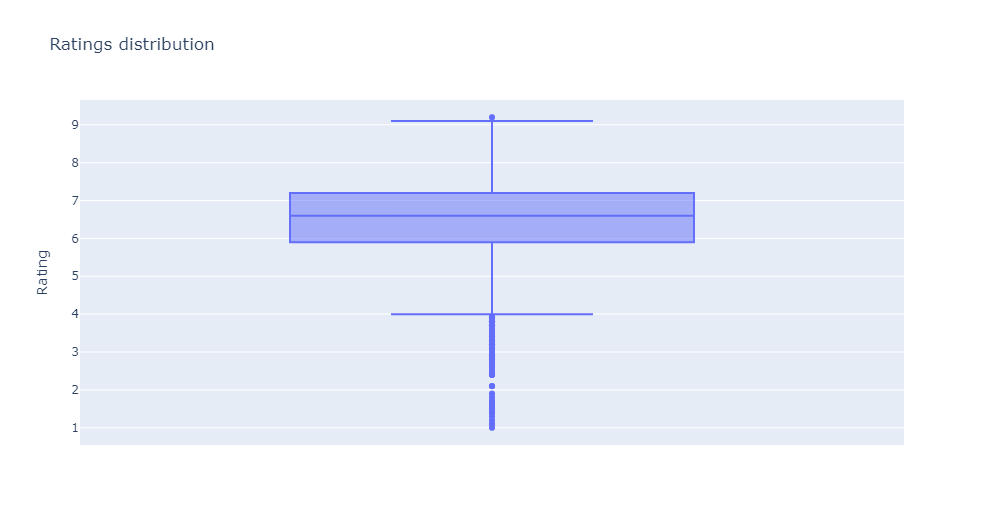

In [41]:
# 'box_office' boxplot
fig_bo = px.box(data, y='box_office', title='Box office distribution', labels=dict(box_office='Box office, RUB'))
fig_bo.show()

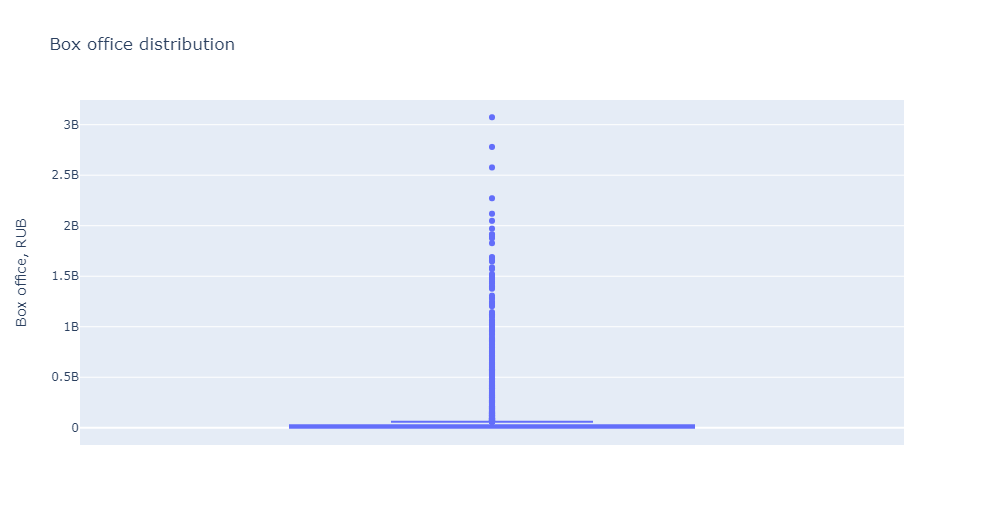

In [42]:
# 'budget' boxplot (for state-supported films only)
fig_budget = px.box(data, y='budget', title='Budget distribution (state-supported films only)', labels=dict(budget='Budget, RUB'))
fig_budget.show()

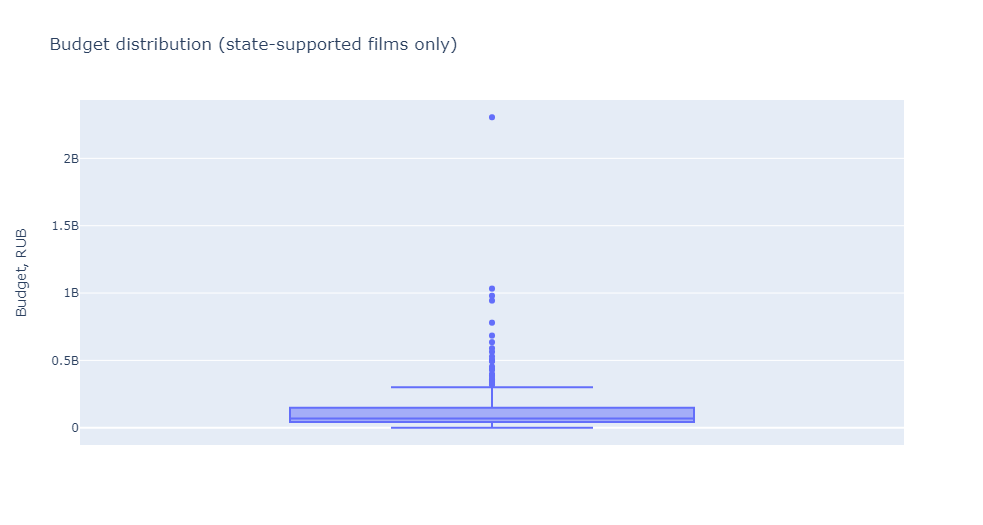

In [43]:
# 'refundable_support' boxplot
fig_ref_support = px.box(data, y='refundable_support', title='Distribution of refundable resources', labels=dict(refundable_support='Total, RUB'))
fig_ref_support.show()

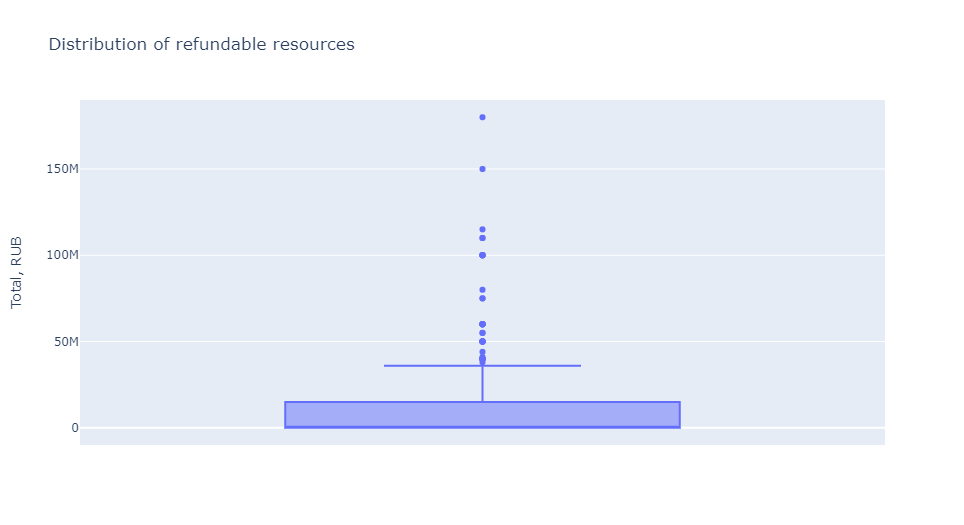

In [44]:
# 'non-refundable_support' boxplot
fig_nonref_support = px.box(data, y='nonrefundable_support', title='Distribution of non-refundable resources', labels=dict(nonrefundable_support='Total, RUB'))
fig_nonref_support.show()

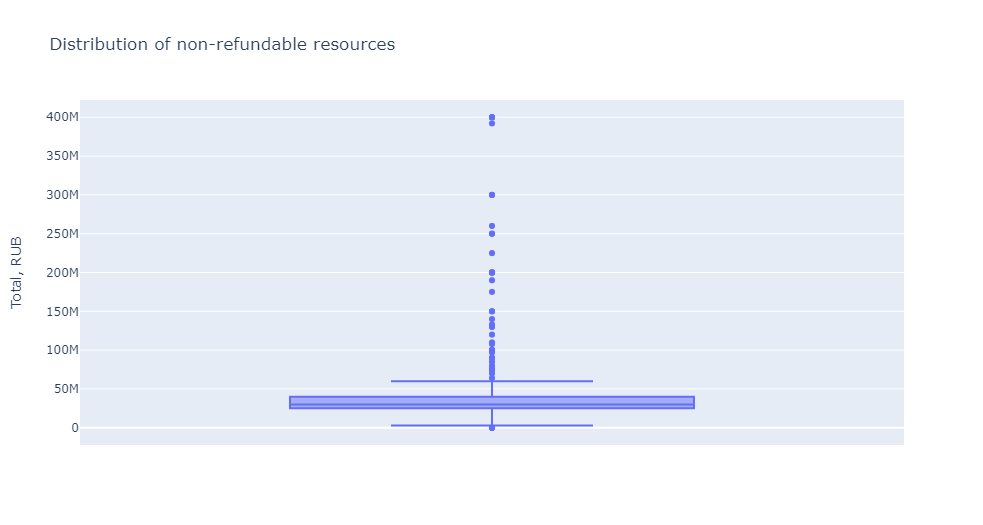

Total budget formula: 
`budget = x + refundable_support + nonrefundable_support`, where x is an unknown amount of money that was spent for filming additionally. Based on this formula, the sum of 'support' columns can not exceed the `budget` column. Let’s check this statement. 

In [45]:
# incorrect 'budget' values check
to_drop = data.query('budget < nonrefundable_support + refundable_support')
to_drop

title  pu_number     show_start_date            type  \
2052                     14+  111023614 2014-12-19 12:00:00  художественный   
2057               дуxless 2  111000415 2015-01-26 12:00:00  художественный   
2471             воин (2015)  111017315 2015-09-28 12:00:00  художественный   
2531                 бармен.  111009615 2015-05-26 12:00:00  художественный   
2614     савва. сердце воина  114001715 2015-07-21 12:00:00    анимационный   
2683          тряпичный союз  111010215 2015-06-08 12:00:00  художественный   
2787      срочно выйду замуж  111017115 2015-09-30 12:00:00  художественный   
2873       помню - не помню!  111004916 2016-03-01 12:00:00  художественный   
3046  любовь с ограничениями  111008216 2016-04-29 12:00:00  художественный   
3564       притяжение (2016)  111018116 2016-12-16 12:00:00  художественный   
3674                чудо-юдо  114001817 2017-06-27 12:00:00    анимационный   
3738                    мифы  111004317 2017-06-07 12:00:00  художественный   
5672                   селфи  111012117 2018-02-01 12:00:00  художественный   
5805              два хвоста  114001018 2018-05-31 12:00:00    анимационный   
6007      принцесса и дракон  114003018 2018-08-23 12:00:00    анимационный   
6322                баба яга  114006518 2018-11-08 12:00:00    анимационный   
6822     большое путешествие  114002419 2019-04-20 12:00:00    анимационный   

                                            film_studio production_country  \
2052                         ооо киностудия  "сентябрь"             россия   
2057  ооо "киностудия "слово", ооо "арт пикчерс студия"             россия   
2471   ооо "форпост продакшн", ооо "арт пикчерс студия"             россия   
2531          ао "вайт медиа", ооо "арт пикчерс студия"             россия   
2614   ооо "глюкоза продакшн", ооо "арт пикчерс студия"             россия   
2683                      ооо "кинокомпания "коктебель"             россия   
2787          ао "вайт медиа", ооо "арт пикчерс студия"             россия   
2873                                    ооо "кинофирма"             россия   
3046          ао "вайт медиа", ооо "арт пикчерс студия"             россия   
3564      ооо "водород 2011",  ооо "арт пикчерс студия"             россия   
3674                                    ооо "кинофирма"             россия   
3738           ооо "хайпфилм", ооо "арт пикчерс студия"             россия   
5672  ооо "киностудия "слово", ооо "арт пикчерс студия"             россия   
5805                          ооо "лицензионные бренды"             россия   
6007                          ооо "лицензионные бренды"             россия   
6322                           ооо "арт пикчерс студия"             россия   
6822                          ооо "лицензионные бренды"             россия   

                            director  \
2052                        а.зайцев   
2057                      р.прыгунов   
2471                     а.андрианов   
2531                    д.штурманова   
2614                        м.фадеев   
2683                     м.местецкий   
2787                       с чекалов   
2873                     в.ровенский   
3046                         д.тюрин   
3564                     ф.бондарчук   
3674                       а.лукичев   
3738                    а.молочников   
5672                      н.хомерики   
5805  в.ровенский, н.лопато, в.азеев   
6007                      м.нефедова   
6322                         в.саков   
6822           н.лопато, в.ровенский   

                                               producer  \
2052                                о.гранина, а.зайцев   
2057                 п.ануров, ф.бондарчук, д.рудовский   
2471                           ооо "арт пикчерс студия"   
2531                                        т.вайнштейн   
2614                                         а.чистяков   
2683                              р.борисевич, а.кушаев   
2787              ф.бондарчук, т.вайнштейн, д.рудовский   
28

In all these rows we observe 0  in the`budget` column. We can’t predict how much money other than state support was spent on the film, so we're going to delete these records.

In [46]:
# incorrect rows deleting
data.drop(to_drop.index, inplace=True)

The refundable support median is 0 - i.e. more than half the values are zeros that misrepresent our boxplots and its parameters (mean). We cannot drop these rows because of their large number. We're going to replace these values with `np.nan`, so that they do not affect the further analysis of mean, median, etc. The same we'll do for `non-refundable support` and `budget` values.

In [47]:
# replacing zeros with np.nan
data['refundable_support'].replace(0.0, np.nan, inplace=True)
data['nonrefundable_support'].replace(0.0, np.nan, inplace=True)
data['box_office'].replace(0.0, np.nan, inplace=True)

In [48]:
# new boxplot for refundable_support
fig_ref_support = px.box(data, y='refundable_support', title='Refundable support distribution', labels=dict(refundable_support='Total, RUB'))
fig_ref_support.show()

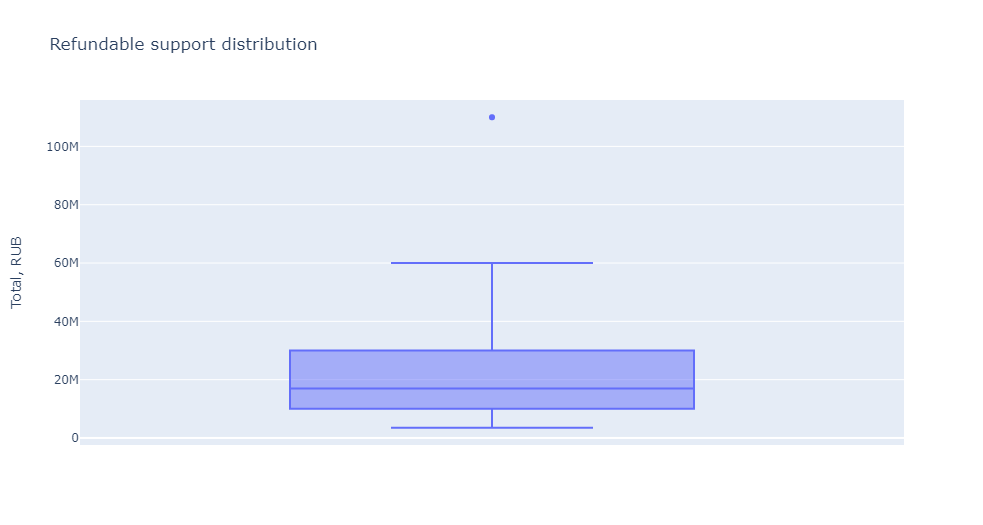

In [49]:
# # new boxplot for non-refundable_support
fig_nonref_support = px.box(data, y='nonrefundable_support', title='Non-refundable support distribution', labels=dict(nonrefundable_support='Total, RUB'))
fig_nonref_support.show()

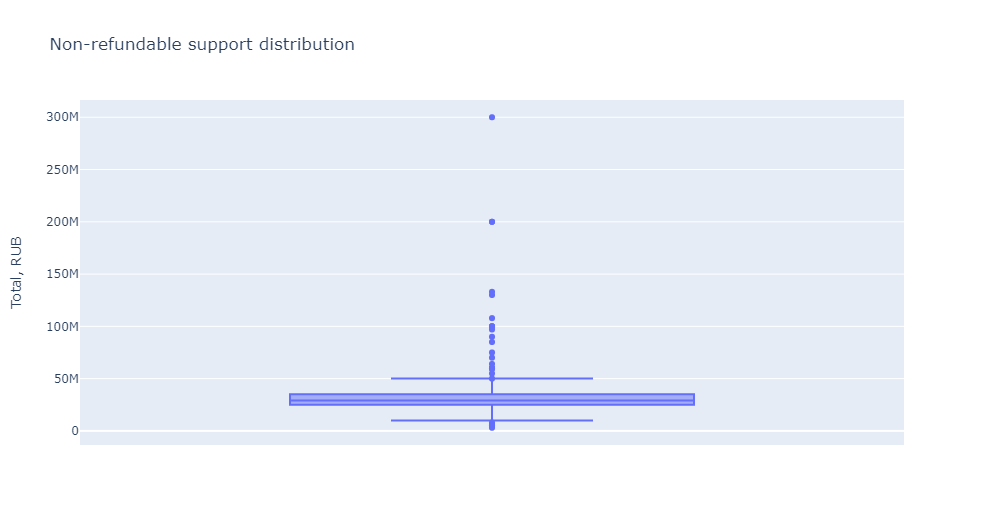

**Boxplots analysis:**

Ratings boxplot: except for a small amount of outliers below the lower whisker, has a normal distribution.

The remaining parameters have a large amount of outliers outside of box whiskers. We'll filter out extreme outliers, i.e. higher than Q3 + 3 * IQR. To do this, let's create a function that defines this boundary.

In [50]:
# boundaries definition function
def get_whisker(column):
    '''The function takes a column as an input, using nanpercentile() method defines 25, 50 and 75 quertiles, calculates
    an interquartile range (IQR) and a border for outliers according to the formula: Q3(75 quartile) + 3*IQR.
    Returns upper boundary. The function also takes into account maximum value of the column (right border must be lower
    than max value).'''
    percentile = np.nanpercentile(column, [25, 50, 75])
    iqr = percentile[2] - percentile[0]
    right_whisker = percentile[2] + 3*iqr
    if right_whisker > column.max():
        right_whisker = column.max()
    return right_whisker

In [51]:
# right whisker calculation for 'budget' and 'box_office' columns
w_budget = get_whisker(data['budget'])
w_box_office = get_whisker(data['box_office'])

In [52]:
# rows percentage for deletion
data.query('budget > @w_budget or box_office > @w_box_office').shape[0]/data.shape[0]

0.0593859412873687

5,8% of total is an acceptable percentage of records for deletion.

In [53]:
# drop outliers
data.drop(data.query('budget > @w_budget or box_office > @w_box_office').index, inplace=True)

In [54]:
# check
data.shape

(6985, 16)

## Data categorization 

In this section we'll replace `age_restriction` values with more compact.

In [55]:
# get uniqe values for 'age_restriction' column
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [56]:
# create a dictionary for replacing
age_dict = {'«18+» - запрещено для детей': '18+', '«12+» - для детей старше 12 лет': '12+', '«16+» - для детей старше 16 лет': '16+', '«6+» - для детей старше 6 лет': '6+', '«0+» - для любой зрительской аудитории': '0+'}

In [57]:
# replacing
data.replace({'age_restriction': age_dict}, inplace=True)

In [58]:
# check
data['age_restriction'].unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

## Interim conclusions

In this section we've:

- edited some of the column headings according to the naming conventions in Python;
- changed the data type in `show_start_date` column (to datetime), `ratings` (to float64);
- found and processed duplicates - transformation to lower register, drop extra spaces;
- found and filled in\delete\leave missing values depending on the particular column;
- categorized `age_restriction` column
- analyzed numerical data distribution using boxplots and filtered out outliers in `refundable_support`, `non-refundable_support` and `box_office` columns
- checked unique values in `financing_source` and `type` columns.

# Dataframe editing (calculated fields).

In this section we'll add next information to our dataset:

* extract year from the premiere date (`dt.year` method);
* executive_director last name (partition `method`);
* main genre from genres (first) (partition `method`);
* state support\budget ratio;

In [59]:
# year extracting
data['year'] = data['show_start_date'].dt.year

In [60]:
# columns with executive director and main genre
data['executive_director'] = data['director'].apply(lambda x: x.partition(',')[0])
data['main_genre'] = data['genres'].apply(lambda x: x.partition(',')[0])

In [61]:
# state support ratio
data['state_share'] = (data['refundable_support'] + data['nonrefundable_support'])/data['budget']

In [62]:
# check
data.head(10)

title  pu_number     show_start_date            type  \
0      открытый простор  221048915 2015-11-27 12:00:00  художественный   
1  особо важное задание  111013716 2016-09-13 12:00:00  художественный   
2          особо опасен  221038416 2016-10-10 12:00:00  художественный   
3          особо опасен  221026916 2016-06-10 12:00:00  художественный   
4          особо опасен  221030815 2015-07-29 12:00:00  художественный   
5     остановился поезд  111013816 2016-09-13 12:00:00  художественный   
6       любовь и голуби  111007013 2013-10-18 12:00:00  художественный   
7     любовь и сигареты  221074614 2014-12-29 12:00:00  художественный   
8    отпетые мошенники.  121011416 2016-05-05 12:00:00  художественный   
9   отпуск за свой счет  111019114 2014-12-01 12:00:00  художественный   

                                         film_studio production_country  \
0  тачстоун пикчерз, кобальт пикчерз, бикон пикче...                сша   
1                              киностудия "мосфильм"               ссср   
2  юниверсал пикчерз, кикстарт продакшнз, марк пл...                сша   
3  юниверсал пикчерз, кикстарт продакшнз, марк пл...                сша   
4  юниверсал пикчерз, кикстарт продакшнз, марк пл...                сша   
5                              киностудия "мосфильм"               ссср   
6                              киностудия "мосфильм"               ссср   
7  юнайтед артистс, грин стрит филмз, айкон интер...                сша   
8                     пульсар продюксьон, тф1 фильм             франция   
9             киностудия "мосфильм", телевидение внр      ссср, венгрия   

            director                                           producer  \
0      кевин костнер          дэвид валдес, кевин костнер, джейк эбертс   
1          е.матвеев                                                NaN   
2  тимур бекмамбетов  джим лемли, джейсон нетер, марк е.платт, яйн смит   
3  тимур бекмамбетов  джим лемли, джейсон нетер, марк е.платт, яйн смит   
4  тимур бекмамбетов  джим лемли, джейсон нетер, марк е.платт, яйн смит   
5       в.абдрашитов                                                NaN   
6          в.меньшов                                                NaN   
7      джон туртурро                        джон пенотти, джон туртурро   
8       эрик беснард                                        патрис леду   
9            в.титов                                                NaN   

  age_restriction  refundable_support  nonrefundable_support  budget  \
0             18+                 NaN                    NaN     NaN   
1              6+                 NaN                    NaN     NaN   
2             18+                 NaN                    NaN     NaN   
3             18+                 NaN                    NaN     NaN   
4             18+                 NaN                    NaN     NaN   
5              6+                 NaN                    NaN     NaN   
6             12+                 NaN                    NaN     NaN   
7             18+                 NaN                    NaN     NaN   
8             18+                 NaN                    NaN     NaN   
9             12+                 NaN                    NaN     NaN   

  financing_source  ratings                     genres  box_office  year  \
0              NaN     7.20     боевик,драма,мелодрама         NaN  2015   
1              NaN     6.60              драма,военный         NaN  2016   
2              NaN     6.80  фантастика,боевик,триллер         NaN  2016   
3              NaN     6.80  фантастика,боевик,триллер         NaN  2016   
4              NaN     6.80  фантастика,боевик,триллер         NaN  2015   
5              NaN     7.70                      драма         NaN  2016   
6              NaN     8.30          мелодрама,комедия    2,700.00  2013   
7              NaN     6.60   мюзикл,мелодрама,комедия         NaN  2014   
8              NaN     8.00           комедия,криминал         NaN  2016  

# Exploratory Data Analysis (EDA) 

## Films at the box office. Box office dynamics. 

In this section we'll analyze films with the specified box office (in a separate variable). 

In [63]:
# creating new variable
data_film_renting = data.query('box_office == box_office')

In [64]:
# calculate share of these films
round(data_film_renting.shape[0]/data.shape[0]*100, 2)

38.11

In [112]:
# pivot table - number of released films (over the years)
year_sort = data_film_renting.pivot_table(index='year', values='pu_number', aggfunc='count')
layout = {'title': 'Number of films released in 2010-2019', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Count'}}
fig = go.Figure([go.Bar(x=year_sort.index, y=year_sort['pu_number'])], layout=layout)
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))
iplot(fig, show_link=False)

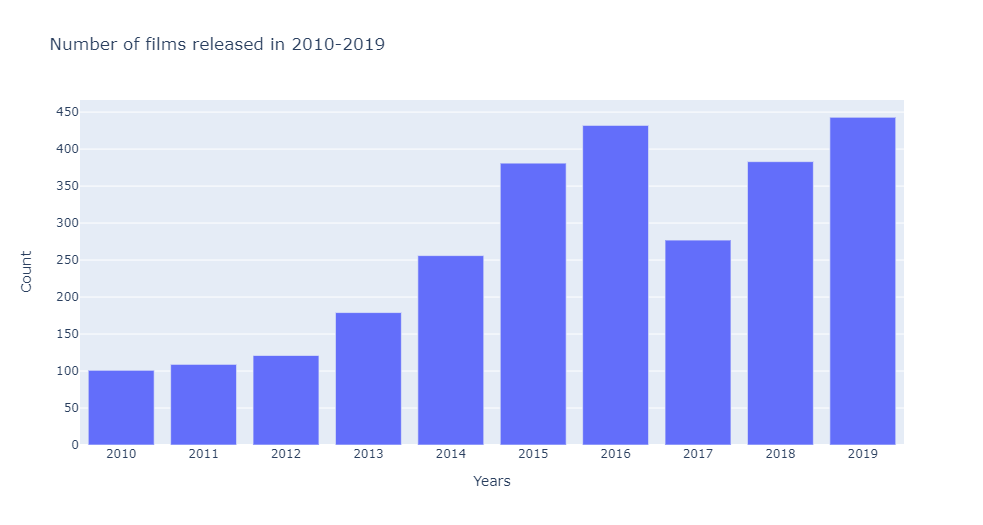

In [66]:
# pivot table - box office over the years
bo_sort = data_film_renting.pivot_table(index='year', values='box_office', aggfunc='sum')
# barplot
layout = {'title': 'Total box office in 2010-2019', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Total, RUB'}}
fig = go.Figure([go.Bar(x=bo_sort.index, y=bo_sort['box_office'])], layout=layout)
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))
iplot(fig, show_link=False)
bo_sort

box_office
year                 
2010     2,428,654.00
2011    14,102,765.00
2012     6,909,333.00
2013    29,799,706.20
2014   699,434,618.20
2015 4,827,456,452.28
2016 4,568,014,365.89
2017 3,644,469,490.59
2018 5,433,748,459.52
2019 5,194,716,597.04

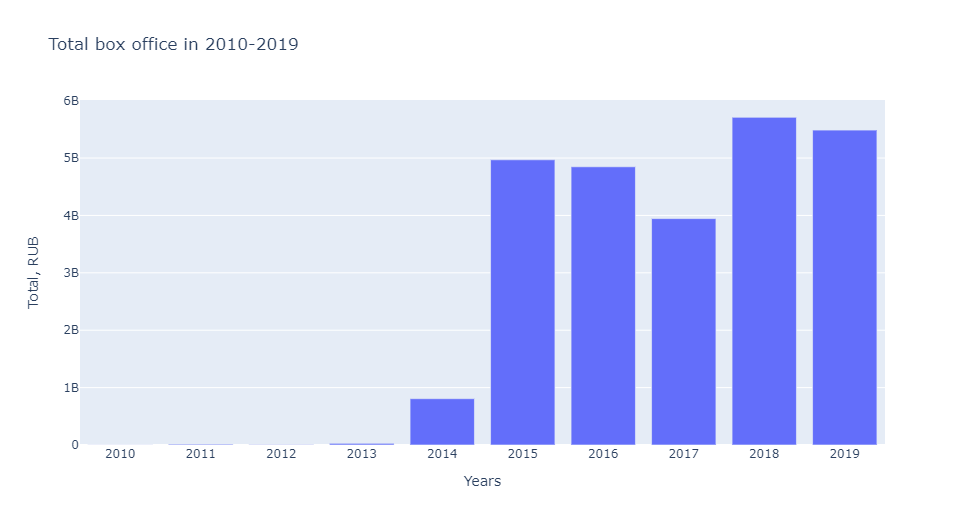

Above the plot we've displayed the pivot table because of the small numbers in 2010-2013.  

Let's calculate mean and median box office over the years.

In [67]:
# pivot table - mean and median box office over the years
bo_mm = data_film_renting.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
bo_mm.columns = ['Mean', 'Median']

In [68]:
trace0 = go.Bar(x=bo_mm.index, y=bo_mm['Mean'], name='Mean')
trace1 = go.Bar(x=bo_mm.index, y=bo_mm['Median'], name='Median')
data_bo = [trace0, trace1]
layout = {'title': 'Mean and median box office in 2010-2019', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Total, RUB'}}
fig_bo = go.Figure(data=data_bo, layout=layout)
fig_bo.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))
iplot(fig_bo, show_link=False)
bo_mm

Mean       Median
year                           
2010     24,046.08     1,710.00
2011    129,383.17     3,000.00
2012     57,101.93     6,220.00
2013    166,478.81     3,580.00
2014  2,753,679.60    16,890.00
2015 12,771,048.82 2,686,997.80
2016 10,672,930.76 1,981,937.00
2017 13,349,705.09 5,480,410.00
2018 14,337,067.18 5,129,695.51
2019 11,806,174.08 3,171,931.50

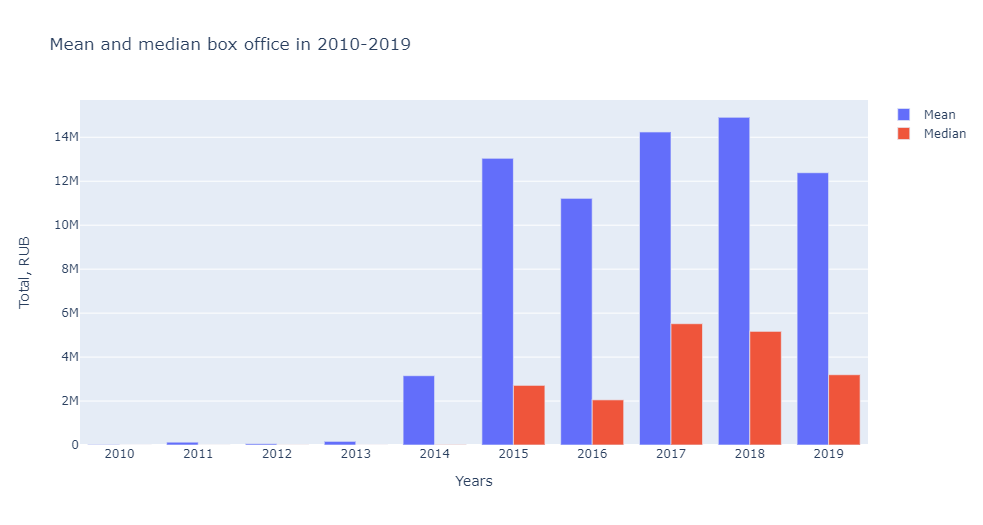

Note that according to our data, the number of films released in 2010-2013 is on average three times smaller than in subsequent years. And over this period, it is extremely difficult to estimate box office values (as well as mean and median values), compared to 2015-2019. Based on this, we'll analyze box office values over the period 2015-2019. Let’s determine whether the age restriction affects box office values.

To analyze the film success by age categories, we'll create the following pivot table (and charts) over the 2015-2019 period for each age category: annual and average box office, the total number of films released. Also, we will build a pivot table to find out what the average box office in each of the categories is (without reference to years).

In [69]:
# building pivot table
bo_age = data_film_renting.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc=['sum', 'count', 'mean'])
bo_age.columns.set_levels(['Box office total','Number of films','Box office average'],level=0,inplace=True)
bo_age

Box office total                                  \
age_restriction               0+            12+              16+   
year                                                               
2010                1,887,611.00     120,146.00       366,512.00   
2011               13,499,871.00     219,891.00       381,513.00   
2012                2,222,133.00     106,994.00     3,254,216.00   
2013                2,710,302.50  20,910,336.50       658,069.60   
2014               62,072,411.70 204,745,927.60   137,590,063.30   
2015              221,029,489.27 455,147,695.21 1,803,906,468.46   
2016              150,228,848.67 702,285,627.26 1,649,072,551.09   
2017               23,120,744.00 290,136,891.51 1,182,770,513.06   
2018               32,449,002.11 523,586,750.99 1,832,289,144.53   
2019               17,746,066.82 523,274,053.56 1,609,865,880.57   

                                                Number of films               \
age_restriction              18+             6+              0+   12+    16+   
year                                                                           
2010                   54,385.00            NaN           22.00 17.00  54.00   
2011                    1,040.00         450.00           30.00 22.00  54.00   
2012                  182,580.00   1,143,410.00           29.00 12.00  47.00   
2013                5,161,245.60     359,752.00           37.00 57.00  44.00   
2014              241,727,013.30  53,299,202.30           37.00 77.00  76.00   
2015            1,570,302,771.03 777,070,028.31           37.00 46.00 141.00   
2016            1,556,824,463.23 509,602,875.64           41.00 62.00 142.00   
2017            1,506,129,681.02 642,311,661.00            2.00 28.00  94.00   
2018            2,218,964,611.91 826,458,949.98            5.00 46.00 126.00   
2019            2,196,809,872.31 847,020,723.78            3.00 68.00 149.00   

                             Box office average                              \
age_restriction    18+    6+                 0+           12+           16+   
year                                                                          
2010              8.00   NaN          85,800.50      7,067.41      6,787.26   
2011              2.00  1.00         449,995.70      9,995.05      7,065.06   
2012             17.00 16.00          76,625.28      8,916.17     69,238.64   
2013             16.00 25.00          73,251.42    366,848.01     14,956.13   
2014             40.00 24.00       1,677,632.75  2,659,038.02  1,810,395.57   
2015            117.00 37.00       5,973,769.98  9,894,515.11 12,793,662.90   
2016            129.00 54.00       3,664,118.26 11,327,187.54 11,613,186.98   
2017            122.00 27.00      11,560,372.00 10,362,031.84 12,582,665.03   
2018            156.00 46.00       6,489,800.42 11,382,320.67 14,541,977.34   
2019            162.00 58.00       5,915,355.61  7,695,206.67 10,804,469.00   

                                             
age_restriction           18+            6+  
year                                         
2010                 6,798.12           NaN  
2011                   520.00        450.00  
2012                10,740.00     71,463.12  
2013               322,577.85     14,390.08  
2014             6,043,175.33  2,220,800.10  
2015            13,421,391.21 21,001,892.66  
2016            12,068,406.69  9,437,090.29  
2017            12,345,325.25 23,789,320.78  
2018            14,224,132.13 17,966,498.91  
2019            13,560,554.77 14,603,805.58

In [70]:
# drop 2010-2014 rows
bo_age.drop([2010,2011,2012,2013,2014], axis=0, inplace=True)
bo_age

Box office total                                  \
age_restriction               0+            12+              16+   
year                                                               
2015              221,029,489.27 455,147,695.21 1,803,906,468.46   
2016              150,228,848.67 702,285,627.26 1,649,072,551.09   
2017               23,120,744.00 290,136,891.51 1,182,770,513.06   
2018               32,449,002.11 523,586,750.99 1,832,289,144.53   
2019               17,746,066.82 523,274,053.56 1,609,865,880.57   

                                                Number of films               \
age_restriction              18+             6+              0+   12+    16+   
year                                                                           
2015            1,570,302,771.03 777,070,028.31           37.00 46.00 141.00   
2016            1,556,824,463.23 509,602,875.64           41.00 62.00 142.00   
2017            1,506,129,681.02 642,311,661.00            2.00 28.00  94.00   
2018            2,218,964,611.91 826,458,949.98            5.00 46.00 126.00   
2019            2,196,809,872.31 847,020,723.78            3.00 68.00 149.00   

                             Box office average                              \
age_restriction    18+    6+                 0+           12+           16+   
year                                                                          
2015            117.00 37.00       5,973,769.98  9,894,515.11 12,793,662.90   
2016            129.00 54.00       3,664,118.26 11,327,187.54 11,613,186.98   
2017            122.00 27.00      11,560,372.00 10,362,031.84 12,582,665.03   
2018            156.00 46.00       6,489,800.42 11,382,320.67 14,541,977.34   
2019            162.00 58.00       5,915,355.61  7,695,206.67 10,804,469.00   

                                             
age_restriction           18+            6+  
year                                         
2015            13,421,391.21 21,001,892.66  
2016            12,068,406.69  9,437,090.29  
2017            12,345,325.25 23,789,320.78  
2018            14,224,132.13 17,966,498.91  
2019            13,560,554.77 14,603,805.58

In [71]:
# total box office chart
trace_0 = go.Scatter(x=bo_age.index, y=bo_age['Box office total','0+'], name='0+')
trace_12 = go.Scatter(x=bo_age.index, y=bo_age['Box office total','12+'], name='12+')
trace_16 = go.Scatter(x=bo_age.index, y=bo_age['Box office total','16+'], name='16+')
trace_18 = go.Scatter(x=bo_age.index, y=bo_age['Box office total','18+'], name='18+')
trace_6 = go.Scatter(x=bo_age.index, y=bo_age['Box office total','6+'], name='6+')
data_bo_age = [trace_0, trace_12, trace_16, trace_18, trace_6]
layout_bo_age = {'title': 'Box office (total) by age group in 2015-2019', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Count, RUB'}}
fig = go.Figure(data=data_bo_age, layout=layout_bo_age)
fig.update_layout(xaxis = dict(tick0 = 0, dtick = 1))
iplot(fig, show_link=False)

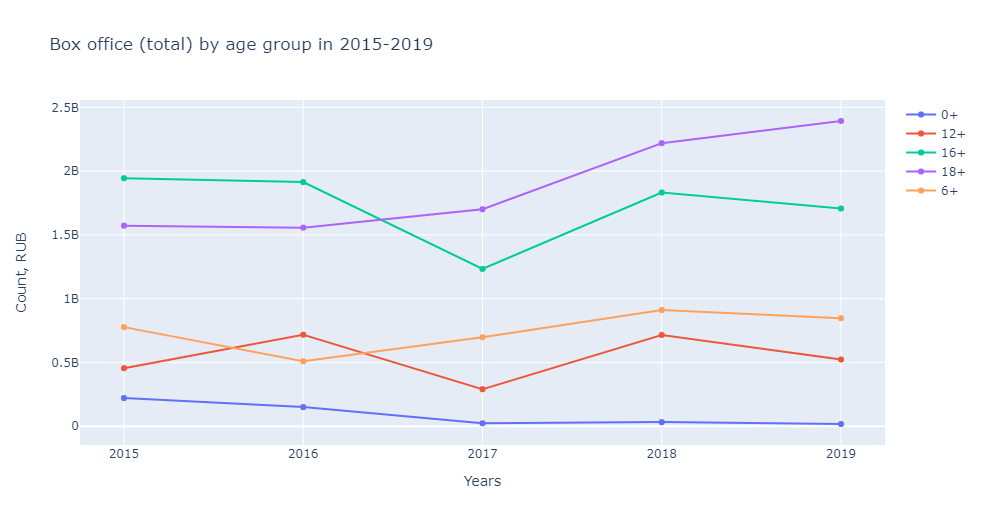

In [72]:
# total number of films chart
trace_0 = go.Scatter(x=bo_age.index, y=bo_age['Number of films','0+'], name='0+')
trace_12 = go.Scatter(x=bo_age.index, y=bo_age['Number of films','12+'], name='12+')
trace_16 = go.Scatter(x=bo_age.index, y=bo_age['Number of films','16+'], name='16+')
trace_18 = go.Scatter(x=bo_age.index, y=bo_age['Number of films','18+'], name='18+')
trace_6 = go.Scatter(x=bo_age.index, y=bo_age['Number of films','6+'], name='6+')
data_bo_age = [trace_0, trace_12, trace_16, trace_18, trace_6]
layout_bo_age = {'title': 'The total number of films by age group in 2015-2019гг.', 'xaxis': {'title': 'Year'}, 'yaxis': {'title': 'Count'}}
fig = go.Figure(data=data_bo_age, layout=layout_bo_age)
fig.update_layout(xaxis = dict(tick0 = 0, dtick = 1))
iplot(fig, show_link=False)

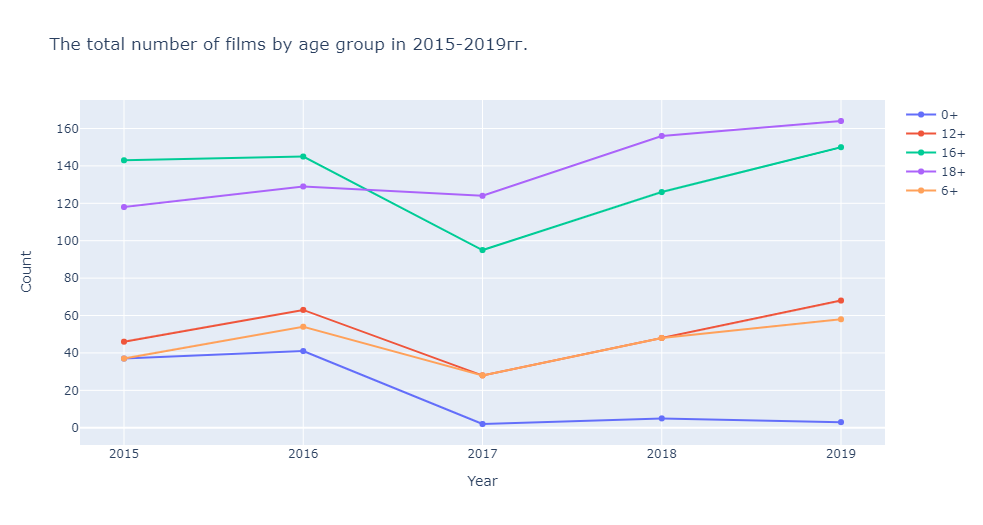

In [73]:
# average box office chart
trace_0 = go.Scatter(x=bo_age.index, y=bo_age['Box office average','0+'], name='0+')
trace_12 = go.Scatter(x=bo_age.index, y=bo_age['Box office average','12+'], name='12+')
trace_16 = go.Scatter(x=bo_age.index, y=bo_age['Box office average','16+'], name='16+')
trace_18 = go.Scatter(x=bo_age.index, y=bo_age['Box office average','18+'], name='18+')
trace_6 = go.Scatter(x=bo_age.index, y=bo_age['Box office average','6+'], name='6+')
data_bo_age = [trace_0, trace_12, trace_16, trace_18, trace_6]
layout_bo_age = {'title': 'Box office (average) by age group in 2015-2019', 'xaxis': {'title': 'Year'}, 'yaxis': {'title': 'Count, RUB'}}
fig = go.Figure(data=data_bo_age, layout=layout_bo_age)
fig.update_layout(xaxis = dict(tick0 = 0, dtick = 1))
iplot(fig, show_link=False)

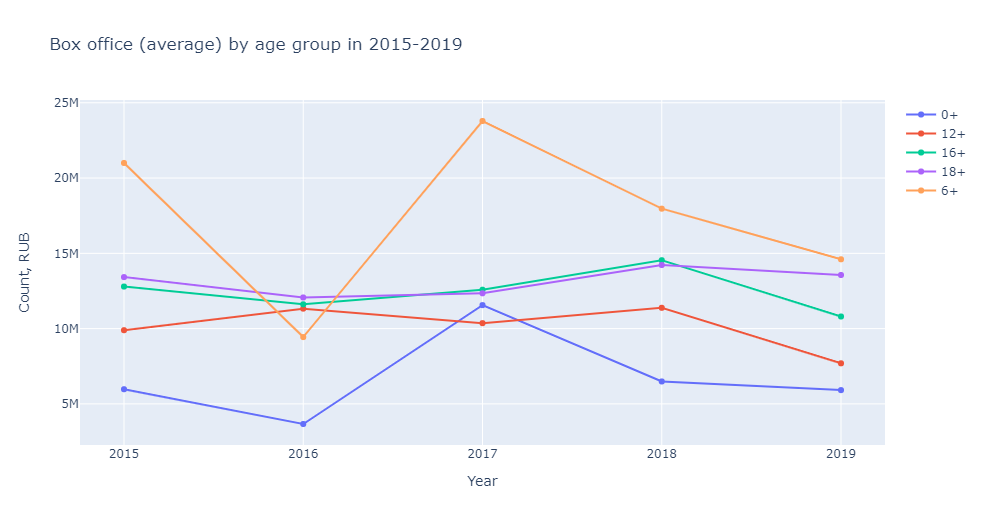

In [74]:
# comparing ratings distrubutions (all films and films at the box office)
trace0 = go.Box(y=data['ratings'], name='All films')
trace1 = go.Box(y=data_film_renting['ratings'], name='Films at the box office')
data_ratings = [trace0, trace1]
layout = {'title': 'Comparing ratings distrubutions', 'yaxis': {'title': 'Rating'}}
fig = go.Figure(data=data_ratings, layout=layout)
iplot(fig, show_link=False)

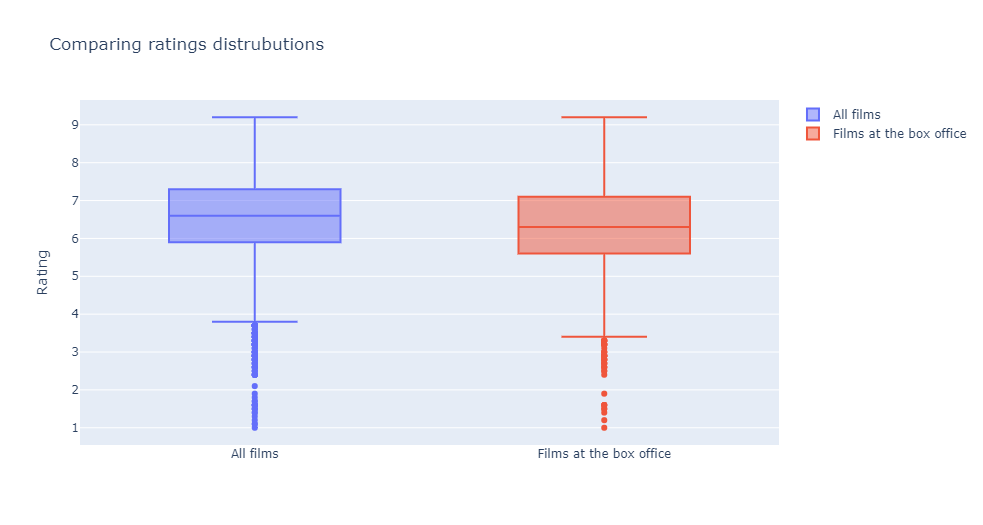

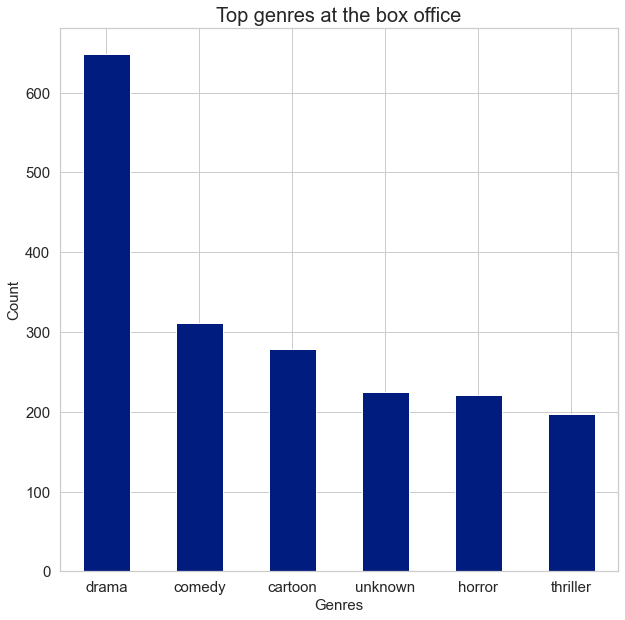

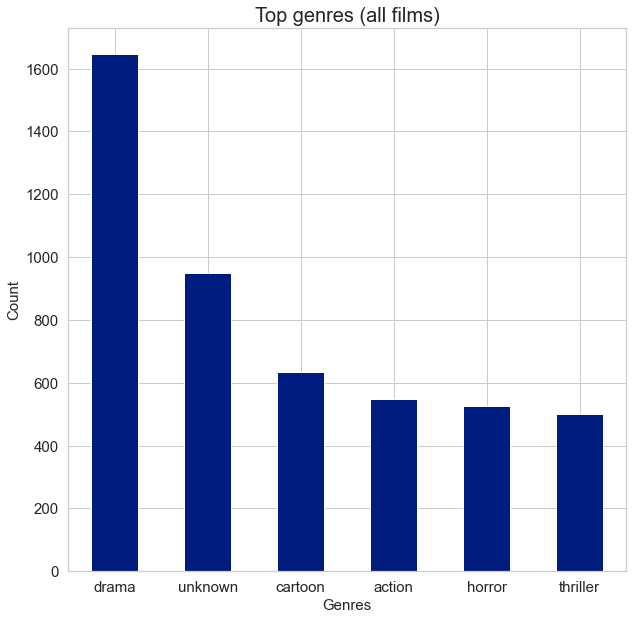

In [75]:
# genres comparing (all films and films at the box office)
(data_film_renting
 .pivot_table(index='main_genre', values='pu_number', aggfunc='count')
 .sort_values(by='pu_number', ascending=False)
 .head(6)
 .plot(kind='bar', legend=False, rot=0, fontsize=15))
plt.xlabel('Genres', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['drama', 'comedy', 'cartoon', 'unknown', 'horror', 'thriller'])
plt.title('Top genres at the box office', fontsize=20)
plt.ylabel('Count', fontsize=15)

(data
 .pivot_table(index='main_genre', values='pu_number', aggfunc='count')
 .sort_values(by='pu_number', ascending=False)
 .head(6)
 .plot(kind='bar', legend=False, rot=0, fontsize=15))
plt.title('Top genres (all films)', fontsize=20)
plt.xlabel('Genres', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['drama', 'unknown', 'cartoon', 'action', 'horror', 'thriller'])
plt.ylabel('Count', fontsize=15);

## Interim conclusions

- cinema films make up 38% of the total;

- 2017 is the most unsuccessful year in terms of both the number of films and the total box office (but the box office average (13.3M RUB) is second only to the average in 2018 and the median (5.48M RUB) is the highest over the studied period (2010-2019).
    - These films may have been more successful for an audience, or it can be explained by the steady flow of people to the cinemas, despite the small number of films.
        
- the total number of films in the box office grows steadily (except 2017), the largest growth (+ 124 films) was observed in 2014-2015;
- the number of movies released in 2019 (443) is four times higher than in 2010 (101);
- the annual box office in 2010-2013 is significantly lower than in the next few years (max. is 30M RUB against 5-5.5B RUB), which can be explained by the smaller number of films, or by a decline in the interest of the audience. It is difficult to estimate these values due to the low number of the released films in 2010-2013.
- in general, over the 2015-2019 period the total value of the box office, as well as its mean are unstable, it is difficult to identify some trends. The median decline since 2017, especially rapidly in 2018-2019.

**Analysis by age group over the period 2015-2019:**

*Box office (total):*
- the total values have increased mainly over the period 2017-2018, and further have no upward trend;
- the highest increase observed in 2017-2018 is for 16+ and 18+ age category films (by 700M RUB for each category) and 6+\12+ (by 200M RUB for each category). 
- 0+ films are not popular, the line of their annual box office declines from 2015 to 2017 (from 150M to 23M RUB) and remains there low and stable;
- there was a slight decrease for 16+ and 12+ categories in 2017 (500M RUB for each category).     

*Box office (mean):*
- has the downward trend in general;
- 16+ and 18+ age groups: despite the leading number of released films and the highest box office, have only the second largest (lower than the 6+ category, that probably is more popular, despite the smaller number of films);
- 12+ group is giving way to 16+ and 18+ categories; 
- also, we observe the increasing popularity of 6+ and 0+ groups in 2017 - despite the lower number of the released films, the box office raising is observed (14M RUB and 7.9m RUB respectively).

*Number of films:*
- this parameter reflects the box office values - the most popular are 16+\18+ age categories (also have the highest box office values);
- with the exception of 0+ films, since 2017 there is an upward trend for all remaining categories;

*Ratings:*
- the ratings of films in the box office are slightly lower than for the whole data (the median is 6.3 vs. 6.6 for all films).

*Genres:*
- as for the whole data, the main genre of films in the box office is drama following by comedies and cartoons (but cartoons are not present in the rating for the original data, that includes action movies). Both subsets have a high percentage of films whose genre is unknown (missing values). 

## State-supported films

In this section we'll analyze state-supported films (in a separate variable) - ratings, payback, etc.

In [76]:
# creating a new variable 
data_state = data.query('budget == budget')

In [77]:
# state-supported films ratio
round(data_state.shape[0]/data.shape[0]*100, 2)

3.28

In [78]:
# general info
print(data_state.shape)
percentiles= [.20, .40, .60, .80]
include=['object', 'float', 'int']
data_state.describe(percentiles = percentiles, include = include).T

(229, 20)


count unique                      top freq  \
title                    229    229            пока еще жива    1   
pu_number             229.00    NaN                      NaN  NaN   
type                     229      3           художественный  215   
film_studio              229    187  ооо "кинокомпания "ств"    6   
production_country       229     12                   россия  217   
director                 229    212            р.давлетьяров    3   
producer                 228    189               с.сельянов    7   
age_restriction          229      5                      16+   97   
refundable_support     55.00    NaN                      NaN  NaN   
nonrefundable_support 225.00    NaN                      NaN  NaN   
budget                229.00    NaN                      NaN  NaN   
financing_source         229      3    министерство культуры  142   
ratings               215.00    NaN                      NaN  NaN   
genres                   229    104                    драма   39   
box_office            216.00    NaN                      NaN  NaN   
year                  229.00    NaN                      NaN  NaN   
executive_director       229    207            р.давлетьяров    4   
main_genre               229     21                    драма   75   
state_share            51.00    NaN                      NaN  NaN   

                                mean           std            min  \
title                            NaN           NaN            NaN   
pu_number             111,621,084.27  6,828,729.87 111,000,115.00   
type                             NaN           NaN            NaN   
film_studio                      NaN           NaN            NaN   
production_country               NaN           NaN            NaN   
director                         NaN           NaN            NaN   
producer                         NaN           NaN            NaN   
age_restriction                  NaN           NaN            NaN   
refundable_support     22,745,454.55 18,918,847.22   3,500,000.00   
nonrefundable_support  35,499,361.76 30,133,675.35   3,000,000.00   
budget                 82,466,310.86 67,972,866.77  15,010,000.00   
financing_source                 NaN           NaN            NaN   
ratings                         5.93          1.15           1.00   
genres                           NaN           NaN            NaN   
box_office             15,059,422.75 23,003,832.94       1,550.00   
year                        2,016.62          1.68       2,013.00   
executive_director               NaN           NaN            NaN   
main_genre                       NaN           NaN            NaN   
state_share                     0.55          0.15           0.12   

                                 20%            40%            50%  \
title                            NaN            NaN            NaN   
pu_number             111,004,415.60 111,008,615.60 111,010,019.00   
type                             NaN            NaN            NaN   
film_studio                      NaN            NaN            NaN   
production_country               NaN            NaN            NaN   
director                         NaN            NaN            NaN   
producer                         NaN            NaN            NaN   
age_restriction                  NaN            NaN            NaN   
refundable_support      7,308,128.60  15,000,000.00  17,000,000.00   
nonrefundable_support  25,000,000.00  25,740,000.00  29,000,000.00   
budget                 39,034,782.60  49,424,396.80  57,874,375.00   
financing_source                 NaN            NaN            NaN   
ratings                         5.10           5.86           6.20   
genres                           NaN            NaN            NaN   
box_office                355,567.00   1,572,434.50   3,070,428.62   
year                        2,015.00       2,016.00       2,016.00   
executive_director               NaN            NaN            NaN   
m

In [79]:
# financing source ratio
data_state['financing_source'].value_counts(normalize=True).to_frame()

financing_source
министерство культуры                         0.62
фонд кино                                     0.29
министерство культуры, фонд кино              0.09

We have three finansing sources: the Ministry of Culture, the Film Foundation and co-financing.

In [80]:
# support ratio dynamics
data_state.pivot_table(index='year', values='state_share')

state_share
year             
2014         0.22
2015         0.54
2016         0.60
2017         0.57
2018         0.53
2019         0.54

In [81]:
# total number of released films (over the years)
year_sort = data_state.pivot_table(index='year', values='pu_number', aggfunc='count')
layout = {'title': 'Number of released films in 2013-2019 (state-supported)', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Count'}}
fig = go.Figure([go.Bar(x=year_sort.index, y=year_sort['pu_number'])], layout=layout)
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))
iplot(fig, show_link=False)

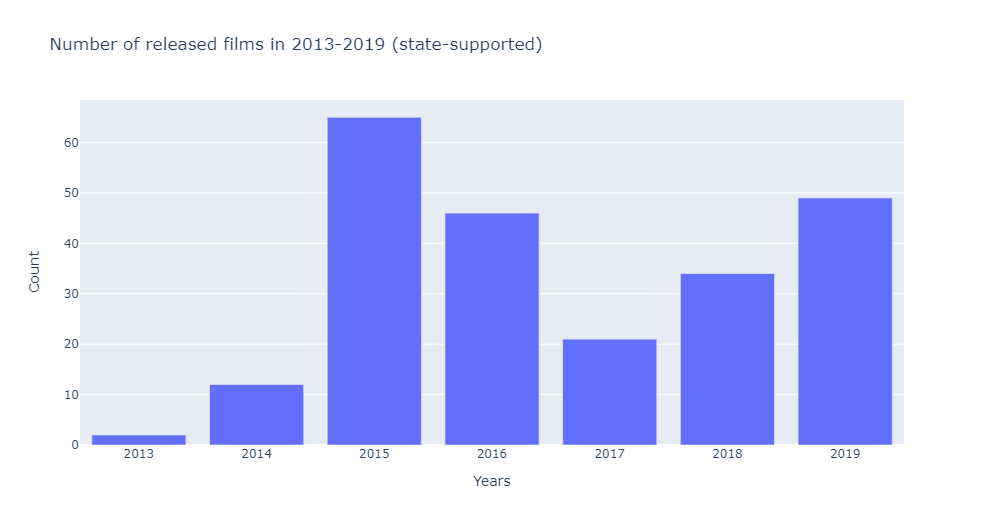

In [82]:
# box office (total)\(non)refundable support ratio
data_state_support = data_state.pivot_table(index='year', values=['box_office', 'refundable_support', 'nonrefundable_support'], aggfunc='sum')
data_state_support.columns = ['Box office', 'Non-refundable support', 'Refundable support']
trace0 = go.Bar(x=data_state_support.index, y=data_state_support['Refundable support'], name='Refundable support')
trace1 = go.Bar(x=data_state_support.index, y=data_state_support['Non-refundable support'], name='Non-refundable support')
trace2 = go.Bar(x=data_state_support.index, y=data_state_support['Box office'], name='Box office')
data_sup = [trace0, trace1, trace2]
layout = {'title': 'Box office (total) and state support dynamics in 2013-2019', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Total, RUB'}}
fig = go.Figure(data=data_sup, layout=layout)
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))
iplot(fig, show_link=False)
data_state_support

Box office  Non-refundable support  Refundable support
year                                                           
2013  20,322,385.10          134,347,945.00                0.00
2014 179,128,043.90          378,002,299.00       15,000,000.00
2015 758,695,053.03        1,807,299,285.00      322,153,119.00
2016 762,621,385.27        1,632,206,000.00      482,500,000.00
2017 141,262,960.04          588,500,866.00       99,346,881.00
2018 646,237,384.28        1,391,000,000.00      149,000,000.00
2019 744,568,103.04        2,056,000,000.00      183,000,000.00

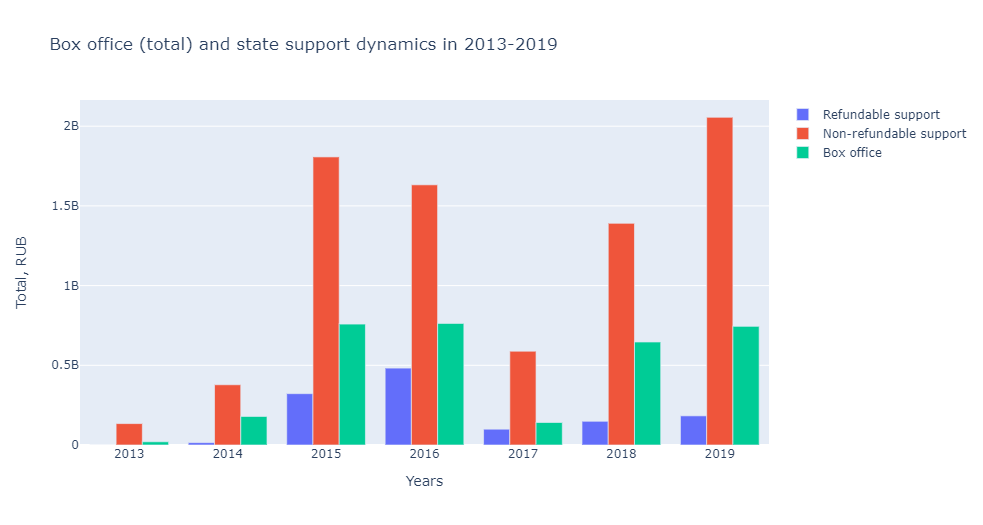

In [83]:
# box office (mean)\(non)refundable support (mean) ratio
ds_mean = data_state.pivot_table(index='year', values=['box_office', 'refundable_support', 'nonrefundable_support'])
ds_mean.columns = ['Box office mean', 'Non-refundable support mean', 'Refundable support mean']
trace0 = go.Bar(x=ds_mean.index, y=ds_mean['Refundable support mean'], name='Refundable support')
trace1 = go.Bar(x=ds_mean.index, y=ds_mean['Non-refundable support mean'], name='Non-refundable support')
trace2 = go.Bar(x=ds_mean.index, y=ds_mean['Box office mean'], name='Box office')
data_sup = [trace0, trace1, trace2]
layout = {'title': 'Mean: box office and state support dynamics in 2013-2019', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Total, RUB'}}
fig = go.Figure(data=data_sup, layout=layout)
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))
iplot(fig, show_link=False)
ds_mean

Box office mean  Non-refundable support mean  Refundable support mean
year                                                                       
2013    10,161,192.55                67,173,972.50                      NaN
2014    14,927,336.99                31,500,191.58            15,000,000.00
2015    11,854,610.20                29,149,988.47            20,134,569.94
2016    16,947,141.89                35,482,739.13            32,166,666.67
2017     7,434,892.63                28,023,850.76            11,038,542.33
2018    19,006,981.89                40,911,764.71            24,833,333.33
2019    18,614,202.58                42,833,333.33            22,875,000.00

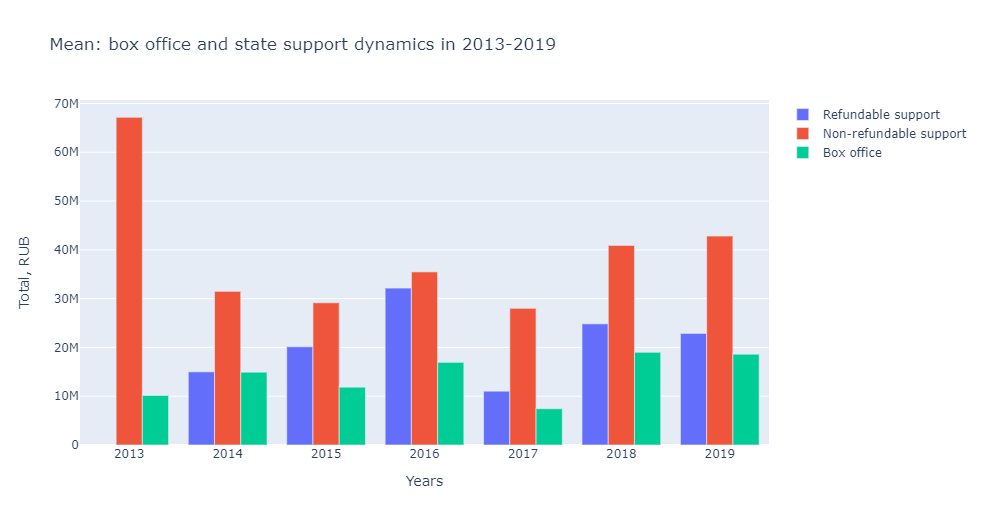

In [84]:
# box office (median)\(non)refundable support (median) ratio
ds_median = data_state.pivot_table(index='year', values=['box_office', 'refundable_support', 'nonrefundable_support'], aggfunc='median')
ds_median.columns = ['Box office median', 'Non-refundable support median', 'Refundable support median']
trace0 = go.Bar(x=ds_median.index, y=ds_median['Refundable support median'], name='Refundable support')
trace1 = go.Bar(x=ds_median.index, y=ds_median['Non-refundable support median'], name='Non-refundable support')
trace2 = go.Bar(x=ds_median.index, y=ds_median['Box office median'], name='Box office')
data_sup = [trace0, trace1, trace2]
layout = {'title': 'Median: box office and state support dynamics in 2013-2019', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Total, RUB'}}
fig = go.Figure(data=data_sup, layout=layout)
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))
iplot(fig, show_link=False)
ds_median

Box office median  Non-refundable support median  \
year                                                     
2013      10,161,192.55                  67,173,972.50   
2014       1,239,860.25                  26,500,000.00   
2015       1,896,707.00                  26,725,000.00   
2016       1,760,990.00                  30,000,000.00   
2017       2,671,050.00                  28,500,000.00   
2018       3,583,374.46                  30,000,000.00   
2019       6,351,235.78                  30,000,000.00   

      Refundable support median  
year                             
2013                        NaN  
2014              15,000,000.00  
2015              15,000,000.00  
2016              25,000,000.00  
2017               7,346,881.00  
2018              22,500,000.00  
2019              26,500,000.00

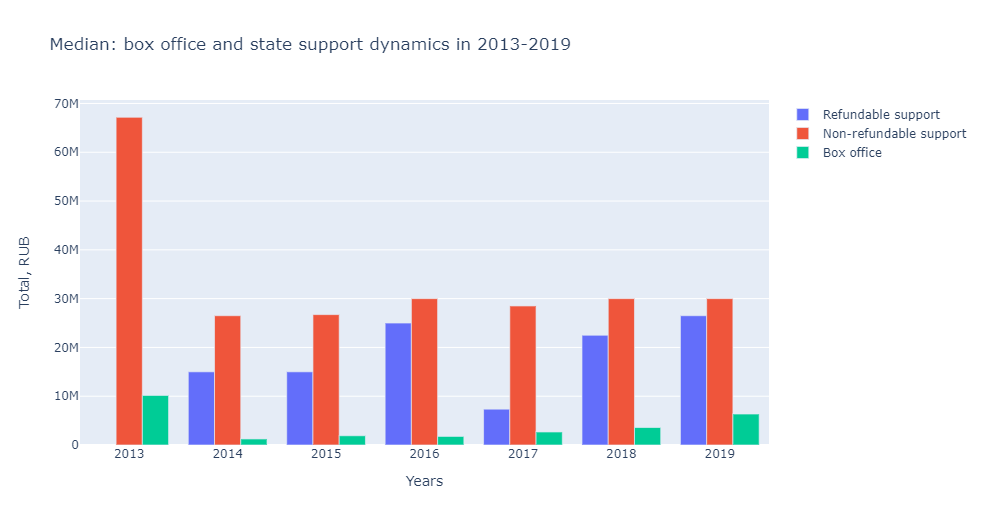

In [85]:
# age_restriction analysis
ds_age = data_state.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc=['sum', 'count', 'mean'])
ds_age.columns.set_levels(['Box office','Number of films','Box office (mean)'],level=0,inplace=True)
ds_age

Box office                                               \
age_restriction            0+            12+            16+            18+   
year                                                                         
2013                      NaN  19,957,031.50     365,353.60            NaN   
2014            32,244,810.00  54,572,022.80   2,667,420.00  89,643,791.10   
2015                61,040.00 210,672,605.29 274,611,054.65  53,107,355.12   
2016               658,870.00 375,174,145.57 234,913,662.72   1,099,917.50   
2017                     0.00  45,809,564.04  34,573,616.00   6,184,430.00   
2018                      NaN 212,207,263.24 233,283,022.49  94,650,107.43   
2019                     0.00  83,865,766.37 328,871,084.37 101,952,685.20   

                               Number of films                         \
age_restriction             6+              0+   12+   16+  18+    6+   
year                                                                    
2013                       NaN             NaN  1.00  1.00  NaN   NaN   
2014                       NaN            1.00  4.00  5.00 2.00   NaN   
2015            220,242,997.97            1.00 15.00 34.00 4.00 10.00   
2016            150,774,789.48            1.00 17.00 16.00 3.00  8.00   
2017             54,695,350.00            0.00  6.00  7.00 3.00  3.00   
2018            106,096,991.12             NaN  9.00 12.00 9.00  4.00   
2019            229,878,567.10            0.00 10.00 17.00 4.00  9.00   

                Box office (mean)                                            \
age_restriction                0+           12+           16+           18+   
year                                                                          
2013                          NaN 19,957,031.50    365,353.60           NaN   
2014                32,244,810.00 13,643,005.70    533,484.00 44,821,895.55   
2015                    61,040.00 14,044,840.35  8,076,795.72 13,276,838.78   
2016                   658,870.00 22,069,067.39 14,682,103.92    366,639.17   
2017                          NaN  7,634,927.34  4,939,088.00  2,061,476.67   
2018                          NaN 23,578,584.80 19,440,251.87 10,516,678.60   
2019                          NaN  8,386,576.64 19,345,357.90 25,488,171.30   

                               
age_restriction            6+  
year                           
2013                      NaN  
2014                      NaN  
2015            22,024,299.80  
2016            18,846,848.69  
2017            18,231,783.33  
2018            26,524,247.78  
2019            25,542,063.01

In [86]:
# box office (total) by age group
trace_0 = go.Scatter(x=ds_age.index, y=ds_age['Box office','0+'], name='0+')
trace_12 = go.Scatter(x=ds_age.index, y=ds_age['Box office','12+'], name='12+')
trace_16 = go.Scatter(x=ds_age.index, y=ds_age['Box office','16+'], name='16+')
trace_18 = go.Scatter(x=ds_age.index, y=ds_age['Box office','18+'], name='18+')
trace_6 = go.Scatter(x=ds_age.index, y=ds_age['Box office','6+'], name='6+')
ds_age_info = [trace_0, trace_12, trace_16, trace_18, trace_6]
layout = {'title': 'Box office (total) by age group in 2015-2019 (state-supported films)', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Total, RUB'}}
fig = go.Figure(data=ds_age_info, layout=layout)
fig.update_layout(xaxis = dict(tick0 = 0, dtick = 1))
iplot(fig, show_link=False)

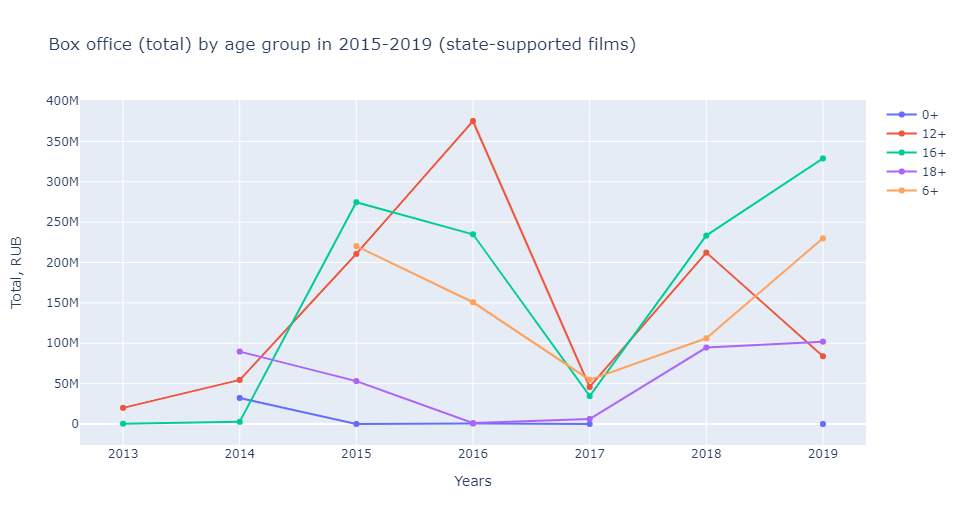

In [87]:
# total number of films (state-supported) by age group
trace_0 = go.Scatter(x=ds_age.index, y=ds_age['Number of films','0+'], name='0+')
trace_12 = go.Scatter(x=ds_age.index, y=ds_age['Number of films','12+'], name='12+')
trace_16 = go.Scatter(x=ds_age.index, y=ds_age['Number of films','16+'], name='16+')
trace_18 = go.Scatter(x=ds_age.index, y=ds_age['Number of films','18+'], name='18+')
trace_6 = go.Scatter(x=ds_age.index, y=ds_age['Number of films','6+'], name='6+')
ds_age_info = [trace_0, trace_12, trace_16, trace_18, trace_6]
layout = {'title': 'The total number of films (state-supported) by age group in 2015-2019гг.', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Count'}}
fig = go.Figure(data=ds_age_info, layout=layout)
fig.update_layout(xaxis = dict(tick0 = 0, dtick = 1))
iplot(fig, show_link=False)

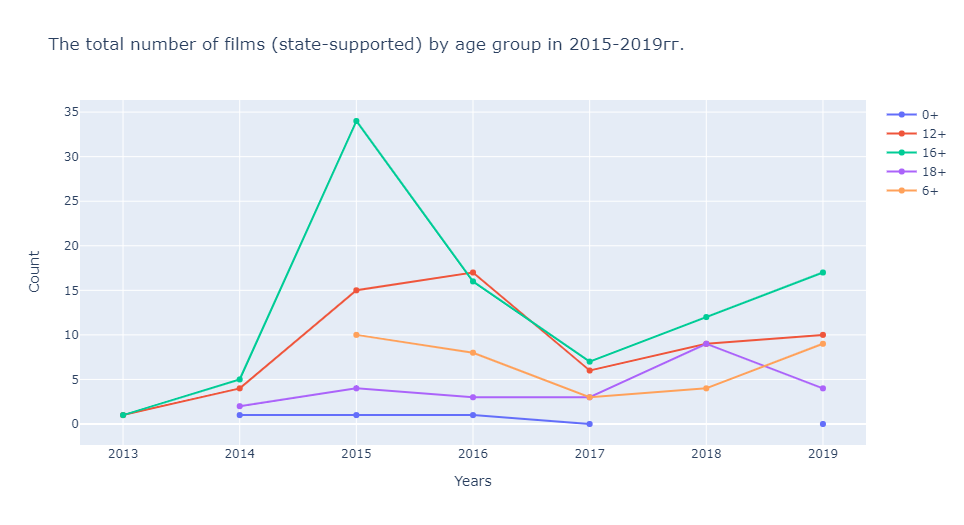

In [88]:
# box office (mean) by age group
trace_0 = go.Scatter(x=ds_age.index, y=ds_age['Box office (mean)','0+'], name='0+')
trace_12 = go.Scatter(x=ds_age.index, y=ds_age['Box office (mean)','12+'], name='12+')
trace_16 = go.Scatter(x=ds_age.index, y=ds_age['Box office (mean)','16+'], name='16+')
trace_18 = go.Scatter(x=ds_age.index, y=ds_age['Box office (mean)','18+'], name='18+')
trace_6 = go.Scatter(x=ds_age.index, y=ds_age['Box office (mean)','6+'], name='6+')
ds_age_info = [trace_0, trace_12, trace_16, trace_18, trace_6]
layout = {'title': 'Box office (mean) by age group in 2015-2019 (state-supported films)', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Total, RUB'}}
fig = go.Figure(data=ds_age_info, layout=layout)
fig.update_layout(xaxis = dict(tick0 = 0, dtick = 1))
iplot(fig, show_link=False)

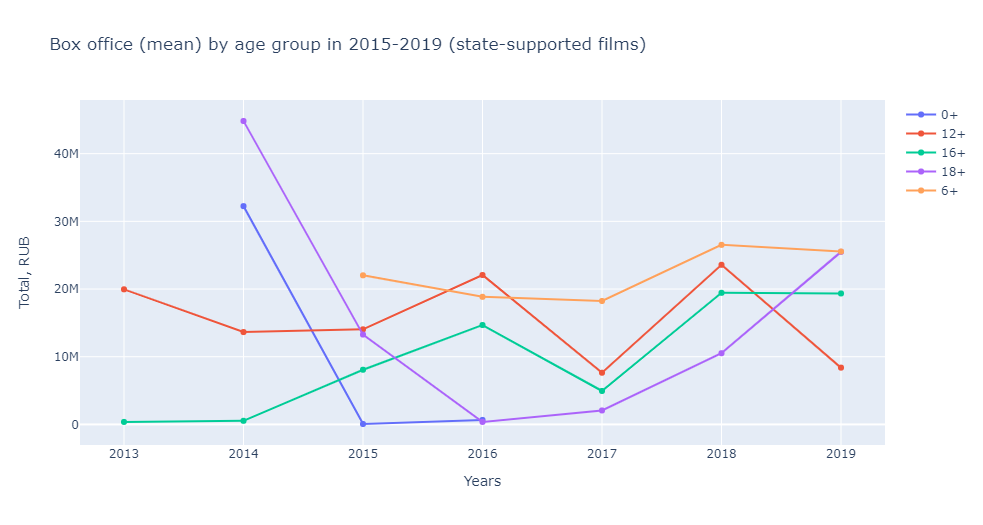

In [89]:
# comparing ratings distrubutions (all films and state-supported films)
trace0 = go.Box(y=data['ratings'], name='Ratings (original data)')
trace1 = go.Box(y=data_film_renting['ratings'], name='Ratings (state-supported films)')
data_ratings = [trace0, trace1]
layout = {'title': 'Comparing ratings distrubutions', 'yaxis': {'title': 'Rating'}}
fig = go.Figure(data=data_ratings, layout=layout)
iplot(fig, show_link=False)

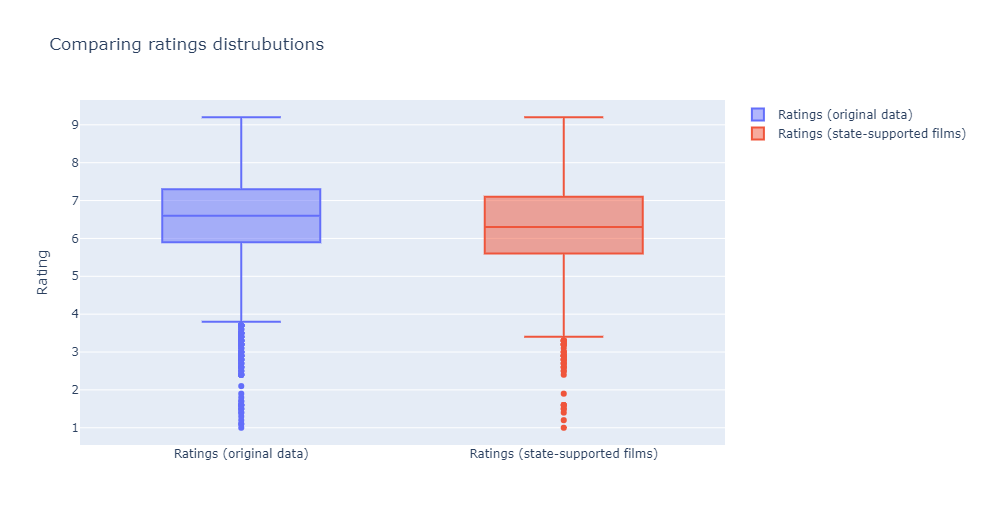

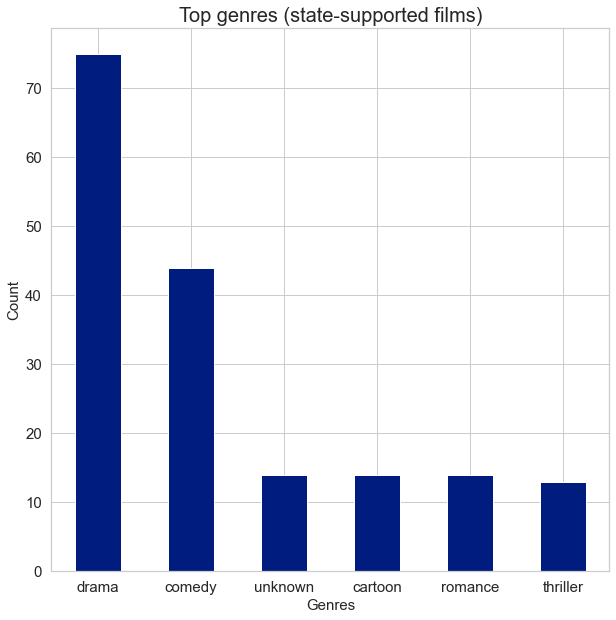

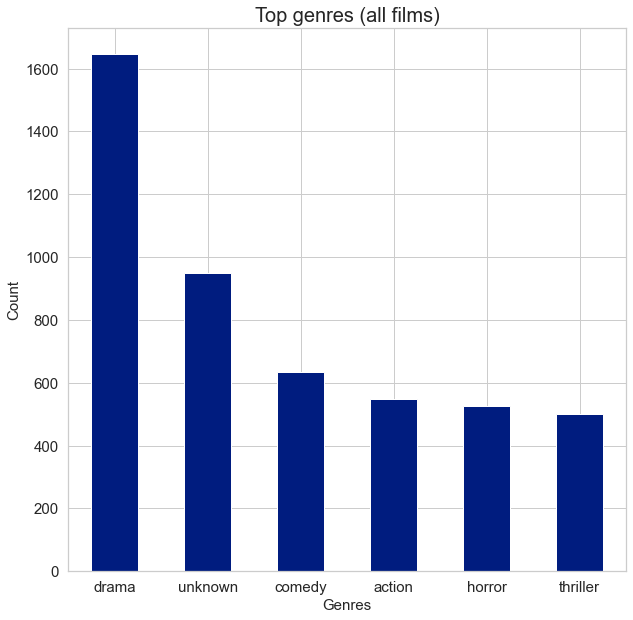

In [90]:
# genres comparing (all films and state-supported films)
(data_state
 .pivot_table(index='main_genre', values='pu_number', aggfunc='count')
 .sort_values(by='pu_number', ascending=False)
 .head(6)
 .plot(kind='bar', legend=False, rot=0, fontsize=15))
plt.xlabel('Genres', fontsize=15)
plt.title('Top genres (state-supported films)', fontsize=20)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['drama', 'comedy', 'unknown', 'cartoon', 'romance', 'thriller'])
plt.ylabel('Count', fontsize=15)

(data
 .pivot_table(index='main_genre', values='pu_number', aggfunc='count')
 .sort_values(by='pu_number', ascending=False)
 .head(6)
 .plot(kind='bar', legend=False, rot=0, fontsize=15))
plt.xlabel('Genres', fontsize=15)
plt.title('Top genres (all films)', fontsize=20)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['drama', 'unknown', 'comedy', 'action', 'horror', 'thriller'])
plt.ylabel('Count', fontsize=15);

## Interim conclusions

- state-supported films make up 3% of the total;
- the analyzed period: 2013 - 2019;
- financong sources - the Ministry of Culture (62% of total films), the Film Foundation (29%) and co-financing (9%). The funds of the Ministry of Culture are non-refundable, the funds of the Film Foundation are refundable.
- state-support share is stable and represents from 55% to 60% of the total film budget;   

**General conclusions:**
- the maximum number of state-supported films was in 2015 (65), then it decreased to 2017 (21), and since 2017 has an upward trend - 49 in 2019.
- the amount of funds is proportional to the number of released films, we observe an increase of non-refundable support in 2019 - 2B RUB against 1.3B RUB in 2018. 
- box office is at best only half of the non-refundable support - films do not pay off. In 2019, box office is only 37% of the funds (744M against 2B RUB). 
    - this is not the case for refundable support - the opposite trend is observed - the box office is constantly higher than funds, there is a positive dynamics in 2018-2019 (the box office is 4 times greater than refundable support);
- as for mean values, the box office does not exceed the funds of support, but the difference between them is smaller in the case of refundable support;
- there is no data about the Film Fundation funds in 2013;
- in 2013 despite the low total of non-refundable support (134M RUB) a higher mean and median is observed - the film received more funds.    

**Analysis by age group over the period 2015-2019:**

*Box office (total):*

- 2017 has the lowest box office values for all age groups (and also the number of released films);
- 6+ and 16+ categories have an upward trend, 12+ category has a downward trend;
- 0+ category - not enough data (these films are not funded);

*Box office (mean):*

- 18+ sharp drop in 2016, then an upward trend is observed;
- 16+, 6+ - weak positive dynamics;
- 12+ - negative dynamics; 

*Number of films:*

- the number of films in categories 6+, 0+, 18+, 12+ changes slightly;
- 16+ age group - 34 films in 2015, the number of films decreases until 2017, and is growing by 2019;

*Ratings:*

- the ratings of state-supported films are slightly lower than for the whole data (the median is 6.3 vs. 6.6 for all films).

*Genres:*

- as for the whole data, the main genres of state-supported films are dramas and comedies, more often funded romances and cartoons (they are not present in the top of the original data). There are a high percentage of films whose genre is unknown (missing values). 

## "Good" films analysis

To determine investment advice, we'll select from our data, so-called "good movies" - with rating 7.0 and higher. We'll analyze the main genres of such films, their age restriction groups and their number in dynamics.

In [91]:
# create a new variable for 'good films'
data_good = data.query('ratings >= 7.0')

In [92]:
# 'good films' ratio
round(data_good.shape[0]/data.shape[0]*100, 2)

31.45

In [93]:
# number of good films over the years
data_good_year = data_good.pivot_table(index='year', values='pu_number', aggfunc='count')
layout = {'title': 'Number of "good" films released in 2010-2019', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Count'}}
fig = go.Figure([go.Bar(x=data_good_year.index, y=data_good_year['pu_number'])], layout=layout)
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))
iplot(fig, show_link=False)

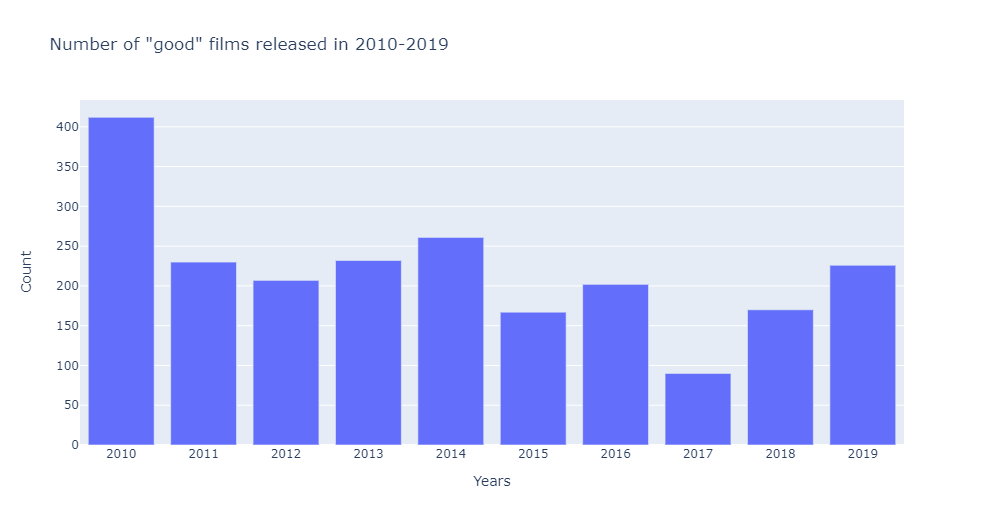

In [94]:
# 'good' films, age restriction groups
data_good_age = data_good.pivot_table(index='age_restriction', values='pu_number', aggfunc='count')
layout = {'title': 'Number of "good" films released in 2010-2019 (by age group)', 'xaxis': {'title': 'Years'}, 'yaxis': {'title': 'Count'}}
fig = go.Figure([go.Bar(x=data_good_age.index, y=data_good_age['pu_number'])], layout=layout)
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1))
iplot(fig, show_link=False)

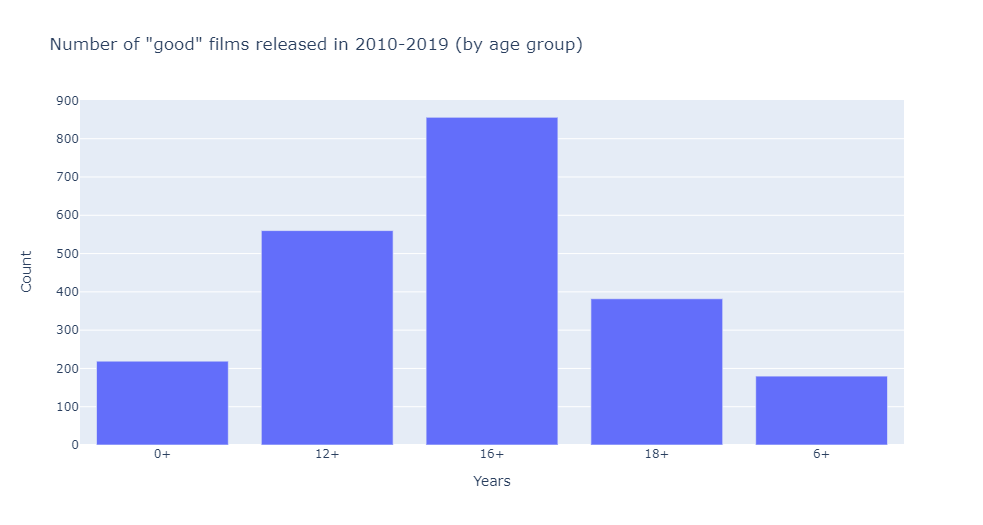

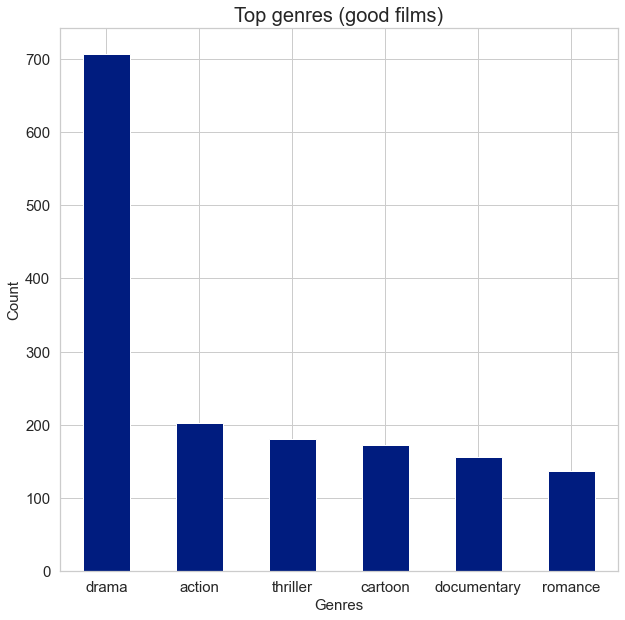

In [95]:
# popular genres
(data_good
 .pivot_table(index='main_genre', values='pu_number', aggfunc='count')
 .sort_values(by='pu_number', ascending=False)
 .head(6)
 .plot(kind='bar', legend=False, rot=0, fontsize=15))
plt.title('Top genres (good films)', fontsize=20)
plt.xlabel('Genres', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['drama', 'action', 'thriller', 'cartoon', 'documentary', 'romance'])
plt.ylabel('Count', fontsize=15);

## Interim conclusions

- over the period 2010-2019 the largest number of 'good 'films was released in 2010 (413), in the remaining years - 200-250 films per year;
- the main age category is 16+, and the next are 12+ and 18+ respectively;
- the most popular genre is still drama, the remaining genres (action film, thriller, cartoon, documentary film) are presented evenly;

# General conclusion

<div style="border:solid green 2px; padding: 20px">

In this project we've analyzed the main trends in film industry in general and in the Russian segment particularly. Also, we've paid attention to the films with state support and answered the question whether they're interesting to a wide audience. The data was provided for us by the Department's of Culture web portal and Kinopoisk platform.   
Analysis covering the period from November 2010 to December 2019. For state-supported films the period is 2013-2019. During the research, it was found that the 2010-2013 data was insufficient for analysis and comparison with data from subsequent years.   
We've analyzed three subsets: films at the box office, state-supported films and 'good' films (with high ratings).
    
**The main points in data preprocessing:**

- editing 'pu_number' column heading according to the naming conventions in Python;
- changing the data type in `show_start_date column` (to datetime), `ratings` (to float64);
- duplicates processing - transformation to lower register, drop extra spaces;
- missing values processing: `genres` (13,04%) - filled with 'unknown', `ratings` (12,04%) - unchanged, `director` (9 rows) - removed;
- categorizing age_restriction column (compact view);
- filtering outliers in `refundable_support`, `non-refundable_support` and `box_office` columns (Q3 + 3 * IQR formula);
- checking unique values in the categorical data;
- incorrect values processing (total budget cannot be less than the sum of refundable and non-refundable support);
- replacing zeros with NaN in `refundable_support`, `nonrefundable_support` columns;
- calculated fields creating: main director, main genre, support ratio;
    
**Some aspects:**
    
* only about 38% of the records box office value is known;
* state-supported films make up 3% of the total;
* there are large number of missing values in `genres` and `ratings` columns (more than 10%) - probably it is possible to set up parsing of this information from several sites. Missing values in `genres` have created the most difficulties when analyzing popular genres.
* zeros in columns `refundable_support`, `nonrefundable_support` - in case of no value, it is recommended to enter NaN instead of 0 (zeros affect mean and median values);
* zeros in the column `budget` - it's source of the anomalous values in the data, because support columns are filled. Parsing setup is required.
    
**Films at the box office (2015-2019):**
    
* insufficient data over the period 2010-2013;
* more and more films are released, the greatest growth (+ 124) during the period 2014-2015.
* but the box office is decreasing - from 2015 to 2017 and from 2018 to 2019. This may be due to a decrease in film quality as well as a decrease in audience interest in film industry. 
* 2017 - the lowest number of films produced, the smallest box office value. However, the mean (13.3M RUB) in this year is second only to 2018, and the median (5.48M RUB) - the highest for the entire period analysed. These films may have been more successful for the audience, or it can be explained by the steady flow of people to the cinemas, despite the decline in the production.
* the mean box office is unstable, there is no single trend;
* films with 16+ and 18+ age restrictions have the highest box office;
* 12+ and 6+ *categories were filmed not so often, but on average per film they collect more money than other age groups;
* in 2017, when fewer films were screened, the popularity of categories the 6+ and 0+ increased (the box office value (mean) was higher);
* ratings are slightly lower than for a whole data (median 6.3 versus 6.6);
* the main genres are drama, comedies, cartoons.
    
**State-supported films (2013-2019):**
    
* financing sources are the Ministry of Culture (62% of total films), the Film Foundation (29%) and co-financing (9%).
* state-support share is stable and represents between 55% and 60% of the total film budget;
* the number of funds as well as number of supported films increases;
* films with non-refundable support do not pay off, the opposite is true for the refundable support - films pay well. 
    * The funds of the Ministry of Culture should be distributed more wisely,  the increase in funding does not lead to the best movies.
* *in average* film payback is negative for any source of funding, i.e. for the films with refundable support it can be assumed that they are divided into "successful" with great profitability and "unfortunate";
* films with 16+, 12+, 6+ age restriction well supported, 0+ almost not funded (not enough data);
* the highest box office have films of categories 6+, 16+, category 12+ - negative trends;
* ratings are slightly lower than for a whole data (median 6.3 versus 6.6);
* the main genres are drama, comedies, cartoons, romance;
    
**"Good" films analysis:**
  
* the highest number of 'good' films was screened in 2010 (413);
* the main age category is 16+;
* the most popular genre is drama;

# Addon

## Genres parsing, ratings boxplots, genres-neighbours.

In the main part of our research, we've selected one of the main genres as the first in the `genres` column. In this section we will parse the `genres` column to find out which of them have the highest ratings. We will also analyze which genres most often coexist with each other.

In [96]:
# ckeck missing values in genres
data['genres'].isnull().sum()

0

In [97]:
# custom function
def split_function(df):
    '''The function takes a dataframe as an input and transforms it to the list of dictionaries. Each item of the list is a
    dictionary (column - value). The function refers to the key `genre` and parses genres to the individual elements. For
    each genre creates a copy of a row with the current genre, counts its weight (three genres - 0.333, two - 0.5, etc.). 
    Appends the copies to the list - we get the list of dictionaries from which the new dataframe is created (separate row
    for each genre).'''
    genres_data = []
    for record in df.to_dict(orient='records'):
        for genre in record['genres'].split(','):
            copy = record.copy()
            copy['genre'] = genre
            copy['weight'] = 1/len(record['genres'].split(','))
            genres_data.append(copy)
    genres_df = pd.DataFrame.from_dict(genres_data)
    return genres_df

In [98]:
# funtion applying
data_remastered = split_function(data)

In [99]:
# check
data_remastered.head(10)

title  pu_number     show_start_date            type  \
0      открытый простор  221048915 2015-11-27 12:00:00  художественный   
1      открытый простор  221048915 2015-11-27 12:00:00  художественный   
2      открытый простор  221048915 2015-11-27 12:00:00  художественный   
3  особо важное задание  111013716 2016-09-13 12:00:00  художественный   
4  особо важное задание  111013716 2016-09-13 12:00:00  художественный   
5          особо опасен  221038416 2016-10-10 12:00:00  художественный   
6          особо опасен  221038416 2016-10-10 12:00:00  художественный   
7          особо опасен  221038416 2016-10-10 12:00:00  художественный   
8          особо опасен  221026916 2016-06-10 12:00:00  художественный   
9          особо опасен  221026916 2016-06-10 12:00:00  художественный   

                                         film_studio production_country  \
0  тачстоун пикчерз, кобальт пикчерз, бикон пикче...                сша   
1  тачстоун пикчерз, кобальт пикчерз, бикон пикче...                сша   
2  тачстоун пикчерз, кобальт пикчерз, бикон пикче...                сша   
3                              киностудия "мосфильм"               ссср   
4                              киностудия "мосфильм"               ссср   
5  юниверсал пикчерз, кикстарт продакшнз, марк пл...                сша   
6  юниверсал пикчерз, кикстарт продакшнз, марк пл...                сша   
7  юниверсал пикчерз, кикстарт продакшнз, марк пл...                сша   
8  юниверсал пикчерз, кикстарт продакшнз, марк пл...                сша   
9  юниверсал пикчерз, кикстарт продакшнз, марк пл...                сша   

            director                                           producer  \
0      кевин костнер          дэвид валдес, кевин костнер, джейк эбертс   
1      кевин костнер          дэвид валдес, кевин костнер, джейк эбертс   
2      кевин костнер          дэвид валдес, кевин костнер, джейк эбертс   
3          е.матвеев                                                NaN   
4          е.матвеев                                                NaN   
5  тимур бекмамбетов  джим лемли, джейсон нетер, марк е.платт, яйн смит   
6  тимур бекмамбетов  джим лемли, джейсон нетер, марк е.платт, яйн смит   
7  тимур бекмамбетов  джим лемли, джейсон нетер, марк е.платт, яйн смит   
8  тимур бекмамбетов  джим лемли, джейсон нетер, марк е.платт, яйн смит   
9  тимур бекмамбетов  джим лемли, джейсон нетер, марк е.платт, яйн смит   

  age_restriction  refundable_support  nonrefundable_support  budget  \
0             18+                 NaN                    NaN     NaN   
1             18+                 NaN                    NaN     NaN   
2             18+                 NaN                    NaN     NaN   
3              6+                 NaN                    NaN     NaN   
4              6+                 NaN                    NaN     NaN   
5             18+                 NaN                    NaN     NaN   
6             18+                 NaN                    NaN     NaN   
7             18+                 NaN                    NaN     NaN   
8             18+                 NaN                    NaN     NaN   
9             18+                 NaN                    NaN     NaN   

  financing_source  ratings                     genres  box_office  year  \
0              NaN     7.20     боевик,драма,мелодрама         NaN  2015   
1              NaN     7.20     боевик,драма,мелодрама         NaN  2015   
2              NaN     7.20     боевик,драма,мелодрама         NaN  2015   
3              NaN     6.60              драма,военный         NaN  2016   
4              NaN     6.60              драма,военный         NaN  2016   
5              NaN     6.80  фантастика,боевик,триллер         NaN  2016   
6              NaN     6.80  фантастика,боевик,триллер         NaN  2016   
7              NaN     6.80  фантастика,боевик,триллер         NaN  2016   
8              NaN     6.80  фантастика,боевик,триллер         NaN  2016  

## Boxplots

In [100]:
# top genres
top_genres = data_remastered.groupby('genre')[['pu_number']].count().sort_values('pu_number', ascending = False).head(10).index.tolist()
top_genres

['драма',
 'комедия',
 'триллер',
 'мелодрама',
 'боевик',
 'unknown',
 'фэнтези',
 'криминал',
 'приключения',
 'ужасы']

In [101]:
# colors generation
colors = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, 10)]
colors

['hsl(0.0,50%,50%)',
 'hsl(40.0,50%,50%)',
 'hsl(80.0,50%,50%)',
 'hsl(120.0,50%,50%)',
 'hsl(160.0,50%,50%)',
 'hsl(200.0,50%,50%)',
 'hsl(240.0,50%,50%)',
 'hsl(280.0,50%,50%)',
 'hsl(320.0,50%,50%)',
 'hsl(360.0,50%,50%)']

In [102]:
# boxplots 
data_box = [{
    'y': data_remastered[data_remastered.genre == top_genres[_]].ratings, 
    'type':'box',
    'marker':{'color': colors[_]},
    'name': top_genres[_]
    } for _ in range(len(top_genres))]

layout = go.Layout(
    title='Ratings',
    yaxis = {'title': 'Ratings'},
    xaxis = {'title': 'Genres'})

fig = go.Figure(data = data_box, layout = layout)
fig.update_xaxes(tickmode = 'array',
                 tickvals = np.arange(11),
                 ticktext= ['drama', 'comedy', 'thriller', 'romance', 'action', 'unknown', 'fantasy', 'criminal',
                           'adventures', 'horror'])
fig.update_layout(showlegend=False)
fig.show()

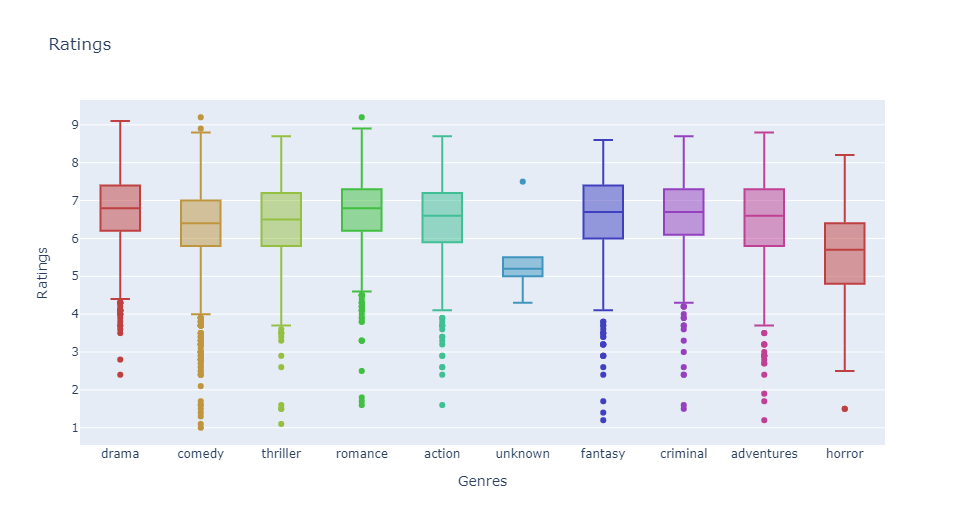

## Coexisting genres

In [103]:
'''We take each row in the `genres` column, parse it to the separate values. For each genre, that is not present in the
dictionary `genres_friends` create a default value - `defaultdict(int)`. Calculate compatibility using a nested list.'''
genres_friends = {}

for string in data.genres:
    split_genres = string.split(',')
    for genre_one in split_genres:
        if genre_one not in genres_friends:
            genres_friends[genre_one] = defaultdict(int)
        for genre_two in split_genres:
            genres_friends[genre_one][genre_two] += 1

In [104]:
# creating a dataframe, filling missing values
genres_friends_df = pd.DataFrame.from_dict(genres_friends).fillna(0)
genres_friends_df.head(5)

боевик    драма  мелодрама  военный  фантастика  триллер  \
боевик     1,018.00   287.00      42.00    30.00      239.00   434.00   
драма        287.00 2,786.00     623.00   142.00      145.00   595.00   
мелодрама     42.00   623.00   1,163.00    20.00       34.00    64.00   
фантастика   239.00   145.00      34.00     3.00      548.00   162.00   
триллер      434.00   595.00      64.00     9.00      162.00 1,327.00   

            комедия  мюзикл  криминал  детектив  приключения  спорт  история  \
боевик       166.00    3.00    165.00     21.00       152.00   5.00    16.00   
драма        544.00   33.00    326.00    142.00       122.00  60.00   150.00   
мелодрама    566.00   36.00     22.00     23.00        26.00   5.00    25.00   
фантастика    84.00    0.00      6.00     14.00        68.00   0.00     0.00   
триллер       62.00    2.00    309.00    204.00        65.00   0.00     7.00   

            семейный  ужасы  мультфильм  короткометражка  фэнтези  биография  \
боевик          8.00  85.00       44.00             1.00   137.00       2.00   
драма          46.00  94.00       36.00             7.00   173.00     232.00   
мелодрама      17.00  11.00       25.00             4.00    98.00      33.00   
фантастика      3.00  98.00       69.00             1.00    74.00       0.00   
триллер         0.00 301.00        4.00             1.00    75.00      13.00   

            unknown  документальный  детский  музыка  вестерн  аниме  \
боевик         0.00            2.00     0.00    0.00     7.00  11.00   
драма          0.00           16.00     0.00   50.00    20.00   7.00   
мелодрама      0.00            0.00     1.00   26.00     0.00   8.00   
фантастика     0.00            1.00     1.00    0.00     0.00  14.00   
триллер        0.00            1.00     0.00    0.00     3.00   0.00   

            для взрослых  концерт  фильм-нуар  новости  реальное тв  
боевик              0.00     0.00        0.00     0.00         0.00  
драма               3.00     0.00        3.00     1.00         0.00  
мелодрама           2.00     0.00        0.00     0.00         0.00  
фантастика          0.00     0.00        0.00     0.00         0.00  
триллер             0.00     0.00        1.00     0.00         0.00

In [105]:
# normalizing
genres_friends_df_norm = genres_friends_df.apply(lambda x: x/data_remastered.groupby('genre').pu_number.count(), axis = 1)
genres_friends_df_norm.head(5)

unknown  аниме  биография  боевик  вестерн  военный  детектив  \
боевик         0.00   0.15       0.01    1.00     0.24     0.16      0.06   
драма          0.00   0.10       0.77    0.28     0.69     0.76      0.37   
мелодрама      0.00   0.11       0.11    0.04     0.00     0.11      0.06   
фантастика     0.00   0.19       0.00    0.23     0.00     0.02      0.04   
триллер        0.00   0.00       0.04    0.43     0.10     0.05      0.54   

            детский  для взрослых  документальный  драма  история  комедия  \
боевик         0.00          0.00            0.01   0.10     0.08     0.09   
драма          0.00          1.00            0.07   1.00     0.74     0.29   
мелодрама      0.01          0.67            0.00   0.22     0.12     0.30   
фантастика     0.01          0.00            0.00   0.05     0.00     0.04   
триллер        0.00          0.00            0.00   0.21     0.03     0.03   

            концерт  короткометражка  криминал  мелодрама  музыка  мультфильм  \
боевик         0.00             0.02      0.25       0.04    0.00        0.08   
драма          0.00             0.14      0.49       0.54    0.39        0.06   
мелодрама      0.00             0.08      0.03       1.00    0.20        0.04   
фантастика     0.00             0.02      0.01       0.03    0.00        0.12   
триллер        0.00             0.02      0.46       0.06    0.00        0.01   

            мюзикл  новости  приключения  реальное тв  семейный  спорт  \
боевик        0.03     0.00         0.25         0.00      0.03   0.06   
драма         0.33     1.00         0.20         0.00      0.17   0.67   
мелодрама     0.36     0.00         0.04         0.00      0.06   0.06   
фантастика    0.00     0.00         0.11         0.00      0.01   0.00   
триллер       0.02     0.00         0.11         0.00      0.00   0.00   

            триллер  ужасы  фантастика  фильм-нуар  фэнтези  
боевик         0.33   0.15        0.44        0.00     0.20  
драма          0.45   0.16        0.26        0.60     0.25  
мелодрама      0.05   0.02        0.06        0.00     0.14  
фантастика     0.12   0.17        1.00        0.00     0.11  
триллер        1.00   0.52        0.30        0.20     0.11

In [106]:
# heatmap
heatmap = go.Heatmap(z = genres_friends_df_norm.values, x = genres_friends_df_norm.index.values, y = genres_friends_df_norm.columns)
layout = go.Layout(title = 'Genres "friends"')
fig = go.Figure(data = heatmap, layout = layout)
fig.show()

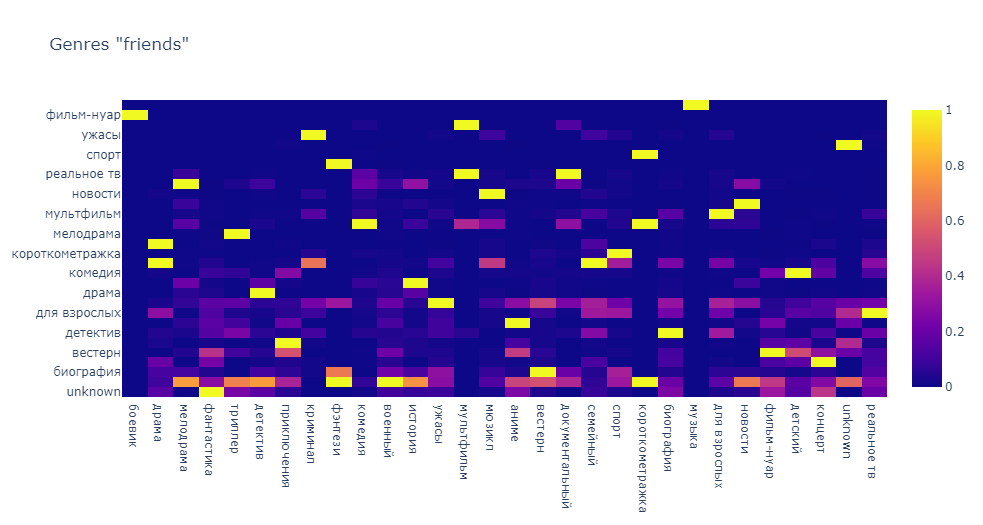

## Ratings dynamics (by genres over the 2010-2019 period).


In [107]:
# preparing pivot table, calculate ratings mean
genre_rating_year_df = data_remastered.groupby(['year', 'genre'], as_index = False)['ratings'].mean()
genre_rating_year_df.head(5)

year      genre  ratings
0  2010    unknown      NaN
1  2010      аниме     7.95
2  2010  биография     7.31
3  2010     боевик     6.73
4  2010    вестерн     6.90

In [108]:
# variables for chart
data_ratings = []
drop_menus = []

In [109]:
# linechart
for i in range(len(top_genres)):
    genre = top_genres[i]
    genre_df = genre_rating_year_df[genre_rating_year_df.genre == genre]

    trace = go.Scatter(
        x = genre_df.year,
        y = genre_df.ratings,
        mode = 'lines',
        name = genre,
        visible = (i == 0)
    )
    data_ratings.append(trace)

In [110]:
# creating drop-down menu
for i in range(len(top_genres)):
    drop_menus.append(
        dict(
            args=['visible', [False]*i + [True] + [False]*(len(top_genres)-1-i)],
            label= top_genres[i],
            method='restyle'
        )
    )

layout = go.Layout(title='Ratings dynamics (by genres in 2010-2019)',
    updatemenus=list([
        dict(
            x = -0.1,
            y = 1,
            yanchor = 'top',
            buttons = drop_menus
        )
    ]),
)

In [111]:
# ratings dynamics
fig = go.Figure(data=data_ratings, layout=layout)
fig.show()

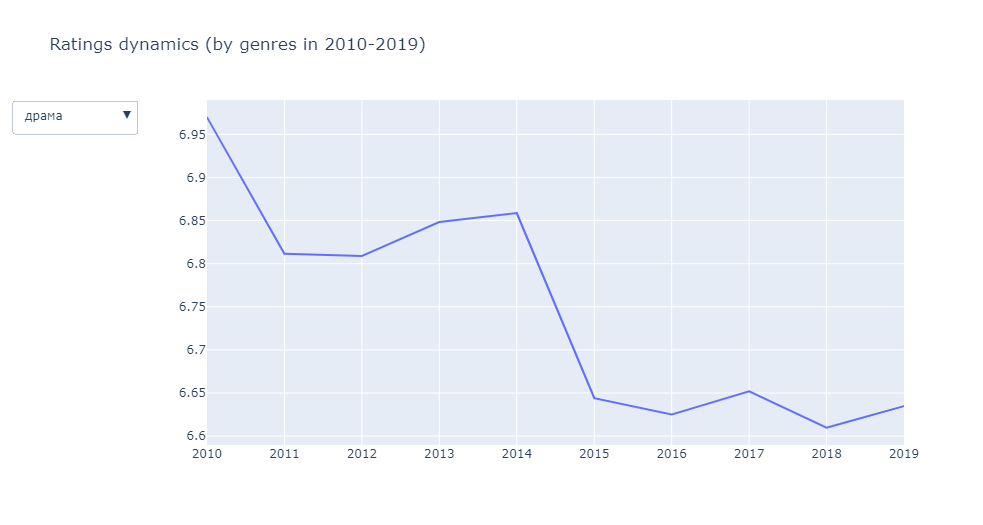